# SCANPLOT - Um Sistema Simples de Plotagem para o SCANTEC

O SCANTEC (Sistema de Avaliação de modelos Numéricos de Tempo e Clima), é um software robusto escrito em linguagem Fortan para a avaliação de modelos numéricos. A sua aplicação fornece as estatísticas básicas para a quantificação dos modelos através da sua habilidade de previsão. O SCANPLOT representa um conjunto de scripts escritos em linguagem Python para facilitar a plotagem das tabelas das estatísticas do SCANTEC.

Este notebook foi pensado como uma forma de apresentação e tutorial do SCANPLOT. Nele, o usuário deverá ser capaz de utilizar os scripts criados alterando apenas os parâmetros necessários para que os scripts encontrem as tabelas do SCANTEC. Com este protótipo, é possível plotar quatro tipos diferentes de gráficos:

* Série temporal em função do tempo de previsão;
* Série temporal em função dos dias das previsões;
* Scorecard do ganho percentual;
* Scorecard da mudança fracional.

O usuário deverá escolher qual tipo de gráfico deseja plotar em função da sua necessidade.

# Tutorial

O tutorial está dividido em três partes. A primeira, "Importando a função desejada", mostra como carregar a função que se encarregará de plotar um dos tipos de gráficos desejados. A segunda parte, "Entrada dos parâmetros", mostra como ajustar os parâmetros principais (nome das variáveis, regiões, tipo de estatística etc) para a plotagem. E a terceira parte, "Plotagem dos gráficos", mostra como chamar a função carregada na primeira parte, de forma a utilizar os parâmetros ajustados na segunda parte.

Siga o tutorial a seguir para aprender a utilizar o SCANPLOT.

## 1. Importando a função desejada

O primeiro passo para a utilização do SCANPLOT, é definir que tipo de gráfico desejamos construir. Em parte, isso dependerá da forma como o SCANTEC foi utilizado na avaliação. Basicamente, o SCANTEC pode ser aplicado de duas formas distintas: indicando-se as mesmas datas de início de fim; ou, indicando-se duas datas diferentes para o início e o fim. No primeiro caso, o usuário precisará de um script que se encarregará de atualizar as datas de início e fim, de forma que a avaliação possa ser feita para diferentes datas. Ainda neste caso, as tabelas de avaliação serão escritas para cada um dos dias em que o SCANTEC foi aplicado. No segundo caso, apenas uma tabela de cada estatística será escrita, compreendendo o período de avaliação indicado. Esta diferença é essencial para a escolha do tipo de gráfico e qual função deverá ser empregada.

As funções disponíveis atualmente no SCANPLOT, são as seguintes:

* scanplot_diário
* scanplot_mensal
* scanplot_scorecard

Utilize a célula a seguir para importar a função desejada. Pressione as teclas "Ctrl+Enter" para prosseguir ou pressione o botão "Run" na barra de ferramentas acima.

In [26]:
from scanplot_mensal_jn import *
from scanplot_diario_jn import *


##versões utilizadas##
Python version: 3.8.2 (default, May  7 2020, 20:00:49) 
[GCC 7.3.0]
NumPy version: 1.18.1
pandas version: 1.0.3
matplotlib version: 3.1.3
seaborn version: 0.10.1
    
##versões utilizadas##
Python version: 3.8.2 (default, May  7 2020, 20:00:49) 
[GCC 7.3.0]
NumPy version: 1.18.1
pandas version: 1.0.3
matplotlib version: 3.1.3
seaborn version: 0.10.1
    


#### Teste Json

In [21]:
import json
scantec_conf = open('json/scantec.conf.json')
data_conf = json.load(scantec_conf) 

scantec_vars = open('json/scantec.vars.json')
data_vars = json.load(scantec_vars) 


In [22]:
data_vars['VTMP:500']['variable']

'VTMP'

In [23]:
data_vars['VTMP:500']['level']

'500'

In [ ]:
data_vars['VTMP:500']['name']

In [ ]:
print('date',data_conf['Starting Time'])
print('hh',data_conf['Starting Time'][8:])
print('day',data_conf['Starting Time'][6:8])
print('day',data_conf['Starting Time'][4:6])
print('year',data_conf['Starting Time'][:4])

In [20]:
data_vars

{'VTMP:925': {'variable': 'VTMP',
  'level': '925',
  'name': 'Virtual Temperature @ 925 hPa [K]'},
 'VTMP:850': {'variable': 'VTMP',
  'level': '850',
  'name': 'Virtual Temperature @ 850 hPa [K]'},
 'VTMP:500': {'variable': 'VTMP',
  'level': '500',
  'name': 'Virtual Temperature @ 500 hPa [K]'},
 'TEMP:850': {'variable': 'TEMP',
  'level': '850',
  'name': 'Absolute Temperature @ 850 hPa [K]'},
 'TEMP:500': {'variable': 'TEMP',
  'level': '500',
  'name': 'Absolute Temperature @ 500 hPa [K]'},
 'TEMP:250': {'variable': 'TEMP',
  'level': '250',
  'name': 'Absolute Temperature @ 250 hPa [K]'},
 'PSNM:000': {'variable': 'PSNM',
  'level': '000',
  'name': 'Pressure reduced to MSL [hPa]'},
 'UMES:925': {'variable': 'UMES',
  'level': '925',
  'name': 'Specific Humidity @ 925 hPa [g/Kg]'},
 'UMES:850': {'variable': 'UMES',
  'level': '850',
  'name': 'Specific Humidity @ 850 hPa [g/Kg]'},
 'UMES:500': {'variable': 'UMES',
  'level': '500',
  'name': 'Specific Humidity @ 500 hPa [g/Kg]'}

In [17]:
data_conf

{'Starting Time': '2015050200',
 'Ending Time': '2015053100',
 'Analisys Time Step': '06',
 'Forecast Time Step': '06',
 'History Time': '48',
 'scantec tables': '/media/extra/wrk/scantec/SCANTEC_V1/tables',
 'run domain number': '1',
 'run domain lower left lat': '-49.875',
 'run domain lower left lon': '-82.625',
 'run domain upper right lat': '11.375',
 'run domain upper right lon': '-35.375',
 'run domain resolution dx': '0.5',
 'run domain resolution dy': '0.5',
 'Reference Model Name': 'brams',
 'Reference file': '../datain/BRAMS_%y4%m2%d200G-A-%y4-%m2-%d2-000000-g1.ctl',
 'Experiments': {'EXP01': ['brams',
   '../datain/BRAMS_%iy4%im2%id200G-A-%fy4-%fm2-%fd2-%fh20000-g1.ctl']},
 'Climatology Model Name': '3',
 'Climatology file': '/stornext/online6/assim_dados/luiz.sapucci/testcase_scantec/climatologiaJGM/climatologia50yr.%mc.bin',
 'Output directory': '../dataout'}

A instrução a seguir permite que controles de exibição das figuras sejam criados (eg., botões de navegação). Caso queira exportar este notebook para um arquivo (eg., PDF, LaTeX), será necessário comentar a instrução abaixo, reiniciar o Kernel e executar todas as células novamente.

In [37]:
#%matplotlib qt
%matplotlib inline

## 2. Entrada dos parâmetros

Nesta segunda etapa, devem ser escolhidos os parâmetros que determinarão qual(is) variáveis, região(ões) e estatística(s) serão utilizados para a plotagem do tipo de gráfico escolhido na etapa anterior.

Na célula abaixo, estão sendo selecionados os parâmetros vars=["VVEL-850"], reg=["hs"], stat=["ACOR"], hsin=["00"] e as previsões de 24, 48 e 72 horas (o comando "np.arange(24,96,24)", cria um array com estes valores). Isso significa que a variável "VVEL-850" (ou seja, a componente meridional do vento horizontal em 850 hPa) sobre a região "hs" (isto é, a região hemisfério sul), com a estatítica "ACOR" (isto é, correlação de anomalia), do horário sinótico das 00Z e das previsões indicadas. A variável "base_path" aponta para o caminho onde encontam-se as tabelas do SCANTEC. Você deverá ajustar este caminho para o seu caso. Observe que o nome da variável escolhida reflete o nome da coluna correspondente da tabela "ACOR\*T.scam" do SCANTEC.

In [38]:
# Datas de início, fim mes e ano
# de forma inteira e sem o zero em números menores do que 10
diaInicial = 2
diaFinal   = 31
mes = 5
#ano = 2015
ano = int(data_conf['Starting Time'][:4]) # Ele não reconhece sem usar o int()

# Escolha das variáveis (em listas)
#Vars = ["VVEL-850"]
Vars = [str(data_vars['VTMP:500']['variable'])+"-"+str(data_vars['VTMP:500']['level'])]
Regs = ["hs"]
Stats = ["ACOR"]
#Hsins = ["00"]
Hsins = [data_conf['Starting Time'][8:]] # foi necessário usar []
Fcts = np.arange(24,96,24)

# Caminho para absoluto para as tabelas
base_path_diario = "./aval_SMG/diario/00Z/"
base_path_mensal = "./aval_SMG/mensal/00Z/"

## 3. Plotagem dos gráficos

Nesta última etapa, chama-se a funçao definida na primeira etapa, indicando os parâmetros selecionados na etapa anterior.

In [39]:
from matplotlib import pylab

figura: output/diario/HS/ACOR_DIARIO_VTMP-500_HS_24h_2015-05-0200_2015-05-3100.png


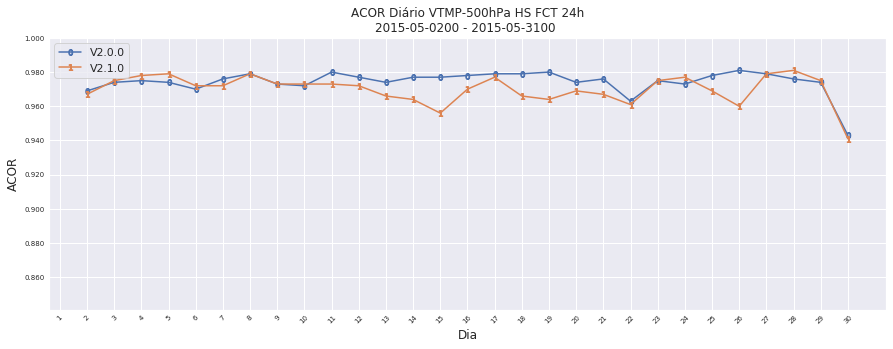

figura: output/diario/HS/ACOR_DIARIO_VTMP-500_HS_48h_2015-05-0200_2015-05-3100.png


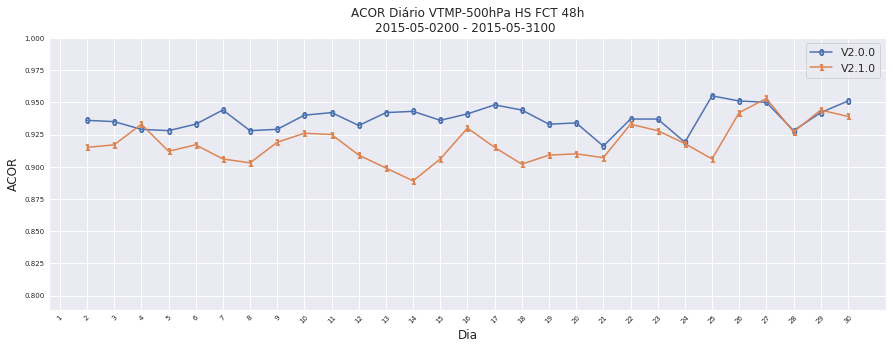

figura: output/diario/HS/ACOR_DIARIO_VTMP-500_HS_72h_2015-05-0200_2015-05-3100.png


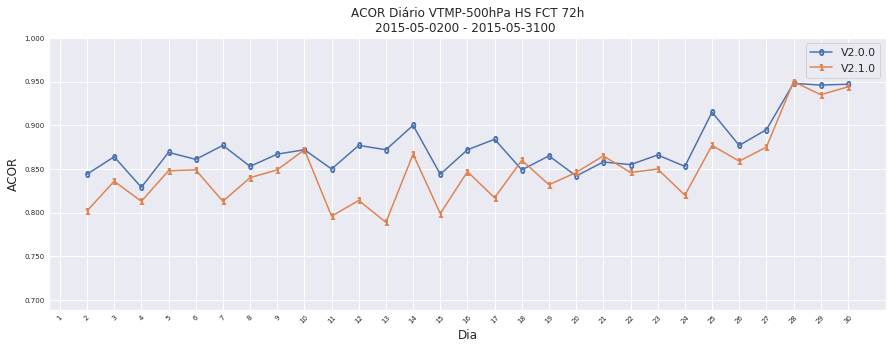

In [40]:
pylab.rcParams['figure.figsize'] = (15,5)
plot_diario(diaInicial,diaFinal,mes,ano,Vars,Stats,Fcts,Regs,Hsins,base_path_diario)


***








figura: output/mensal/HS/ACOR_MENSAL_VTMP-500_HS_0205201500_3105201500.png


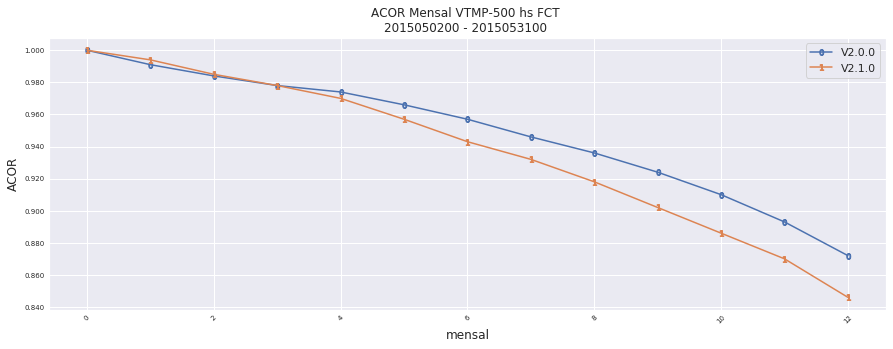

In [41]:
pylab.rcParams['figure.figsize'] = (15,5)
plot_mensal(diaInicial,diaFinal,mes,ano,Vars,Stats,Regs,Hsins,base_path_mensal)

In [42]:
from scanplot_scorecard import *

In [44]:
Stats = ["VIES", "RMSE", "ACOR"]
Regs = ["as", "hn", "hs", "tr"]

Tstats = ["ganho", "fc"]
#Tstats = ["ganho"]

bexp1 = "SMG_V2.0.0"
bexp2 = "SMG_V2.1.0"

#datai = "2015050200"
datai = data_conf['Starting Time']
#dataf = "2015053100"
dataf = data_conf['Ending Time']
tipo = "mensal"
hsin = "00Z"

base_path = "./aval_SMG/"


#list_var=["VTMP-925","VTMP-850", "VTMP-500","TEMP-850","TEMP-500", "TEMP-250","PSNM-000","UMES-925", "UMES-850","UMES-500",   
#"AGPL-925","ZGEO-850","ZGEO-500","ZGEO-250","UVEL-850","UVEL-500","UVEL-250","VVEL-850","VVEL-500","VVEL-250",   
#"PREC-000","PREV-000"]
list_var=[str(data_vars['VTMP:500']['variable'])+"-"+str(data_vars['VTMP:500']['level'])]

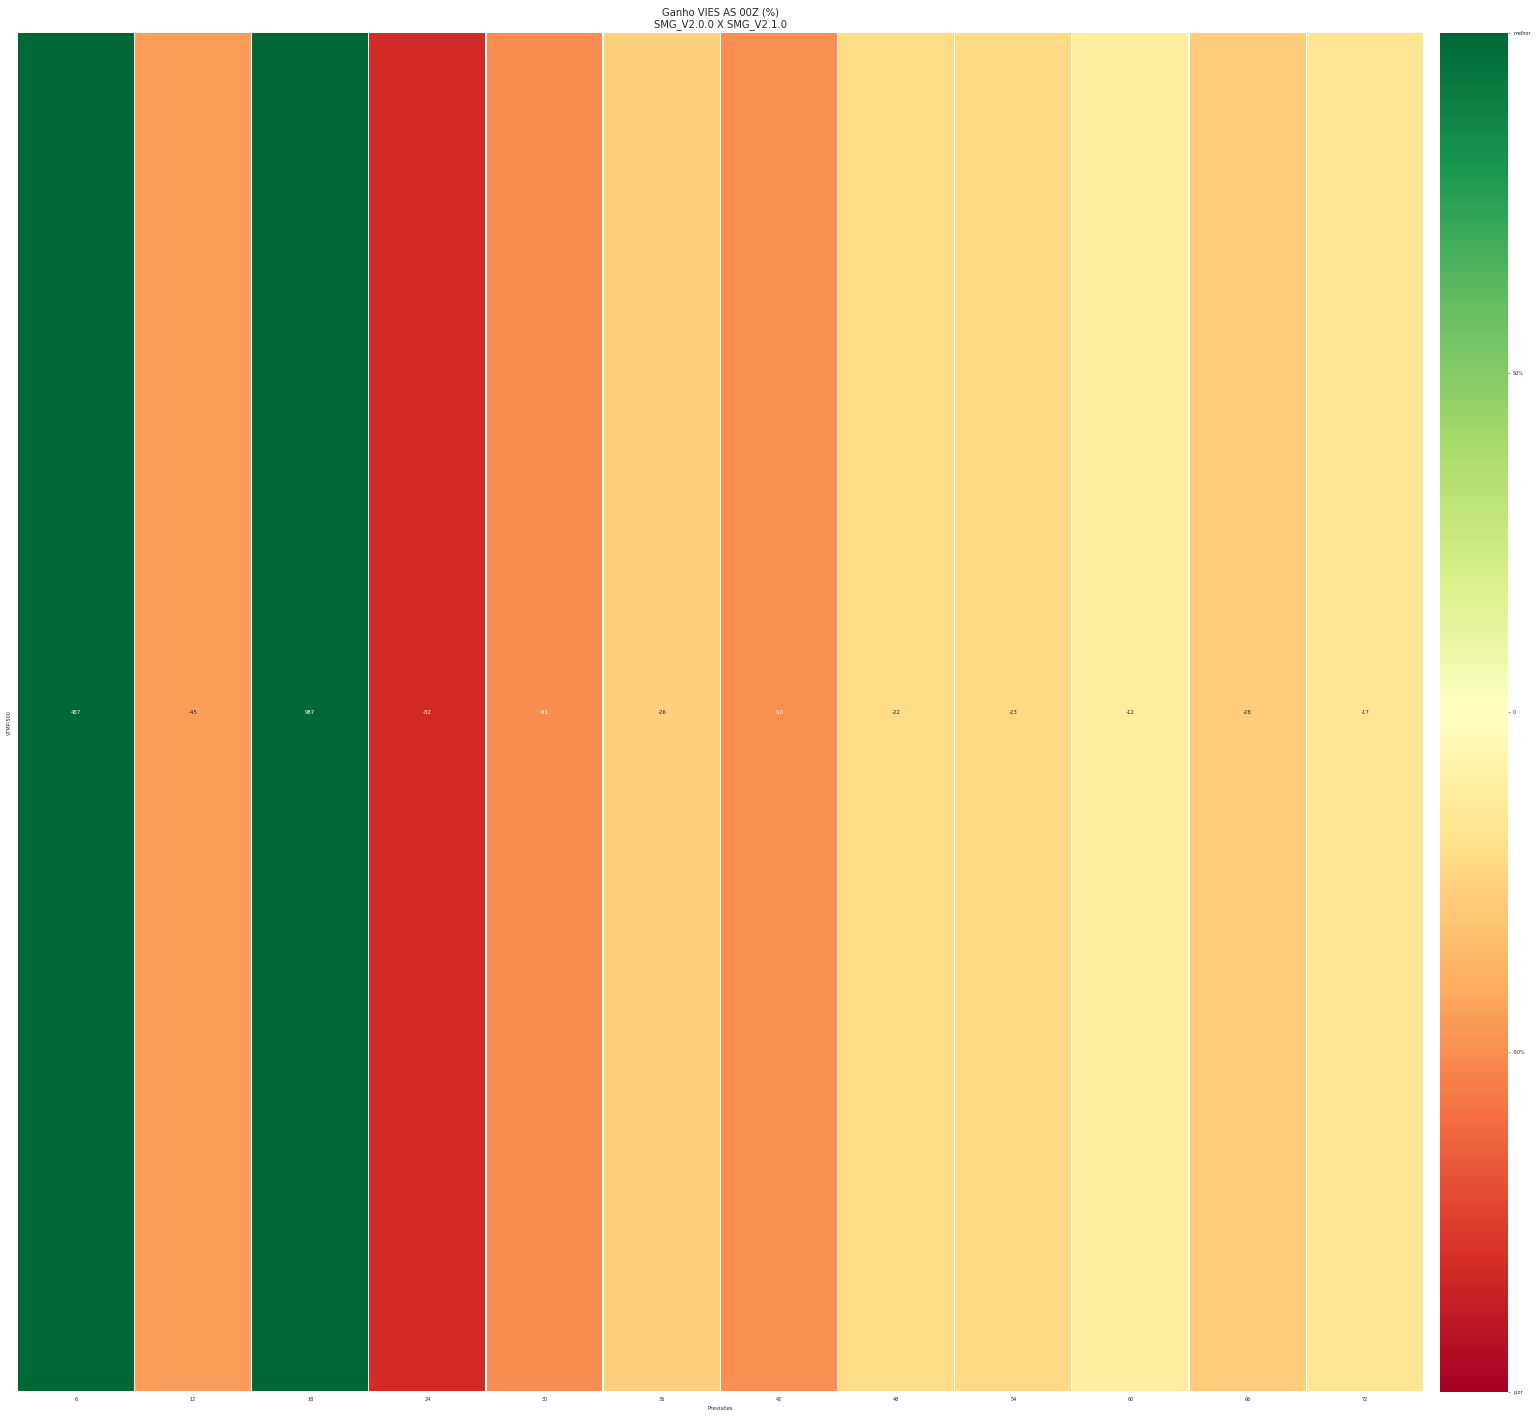

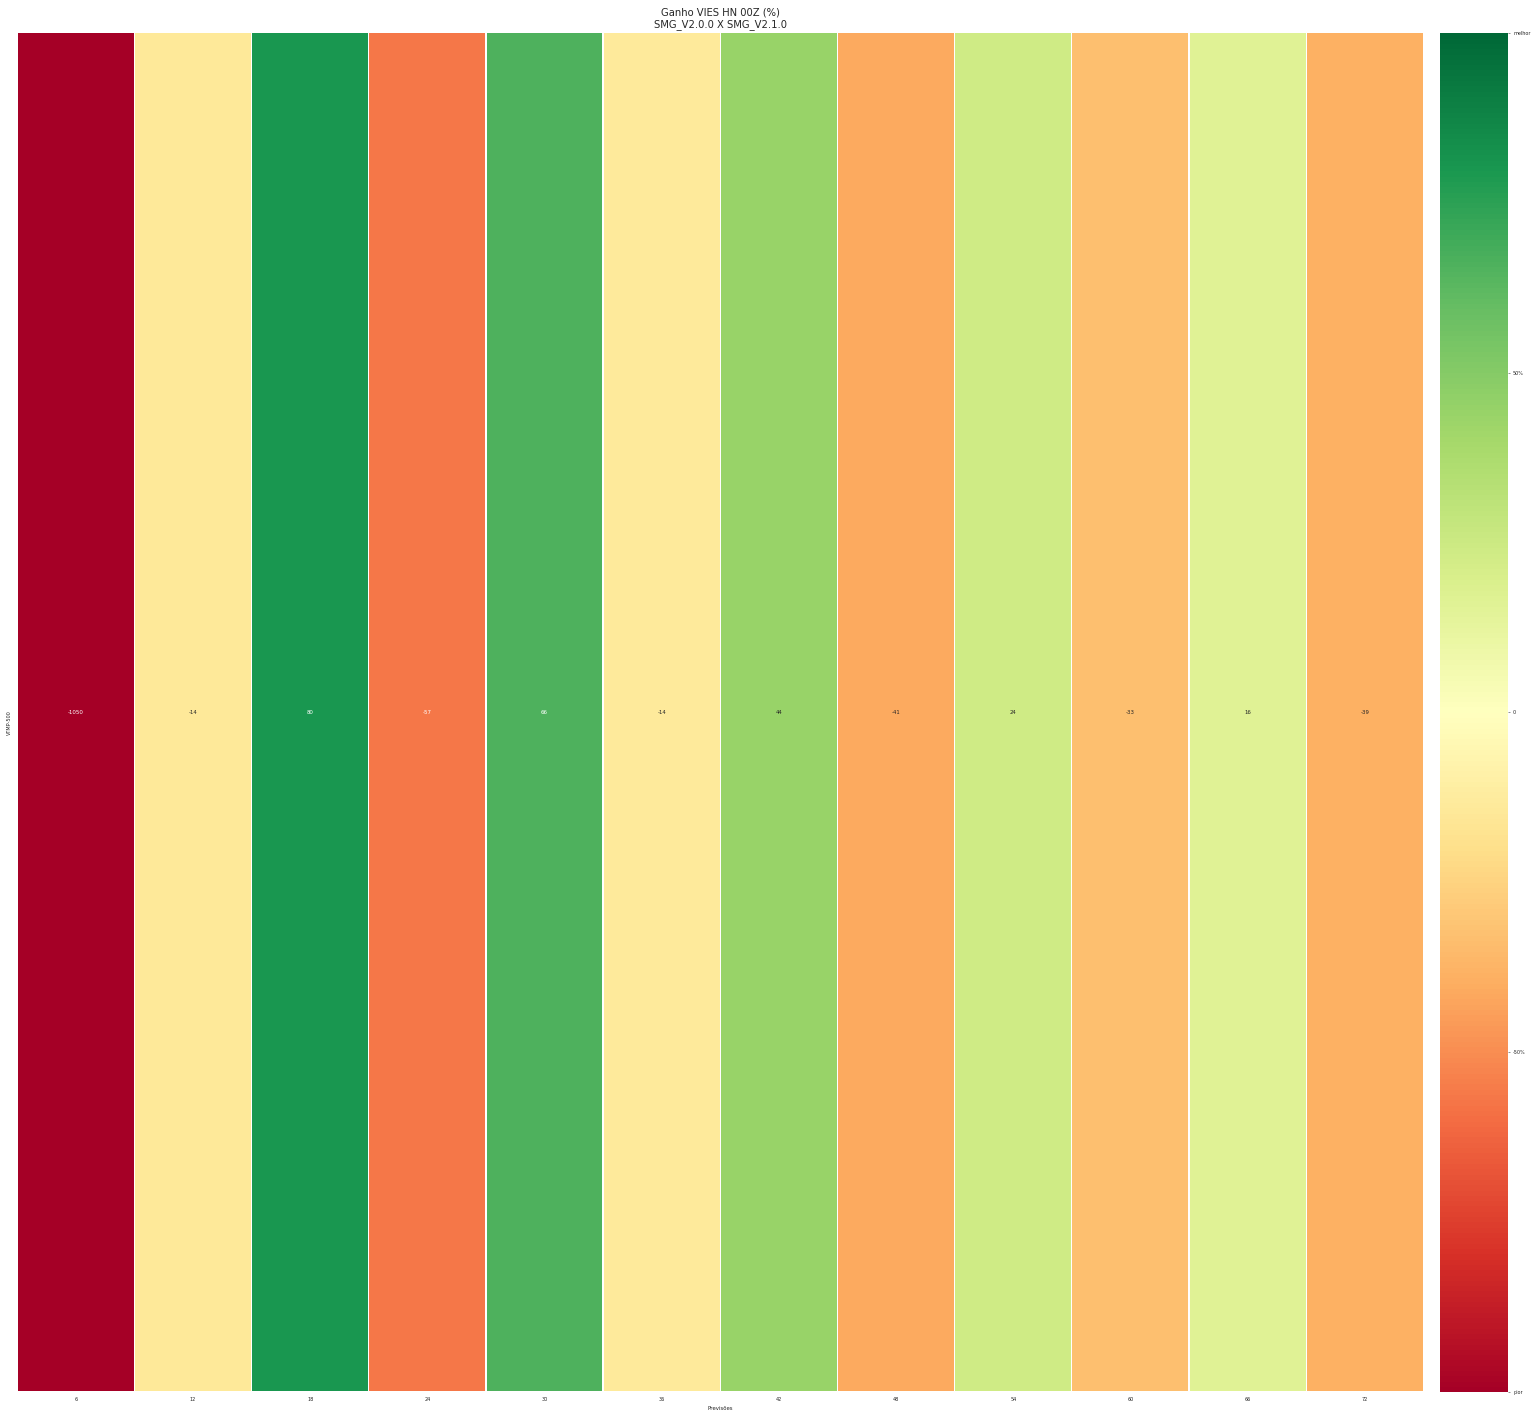

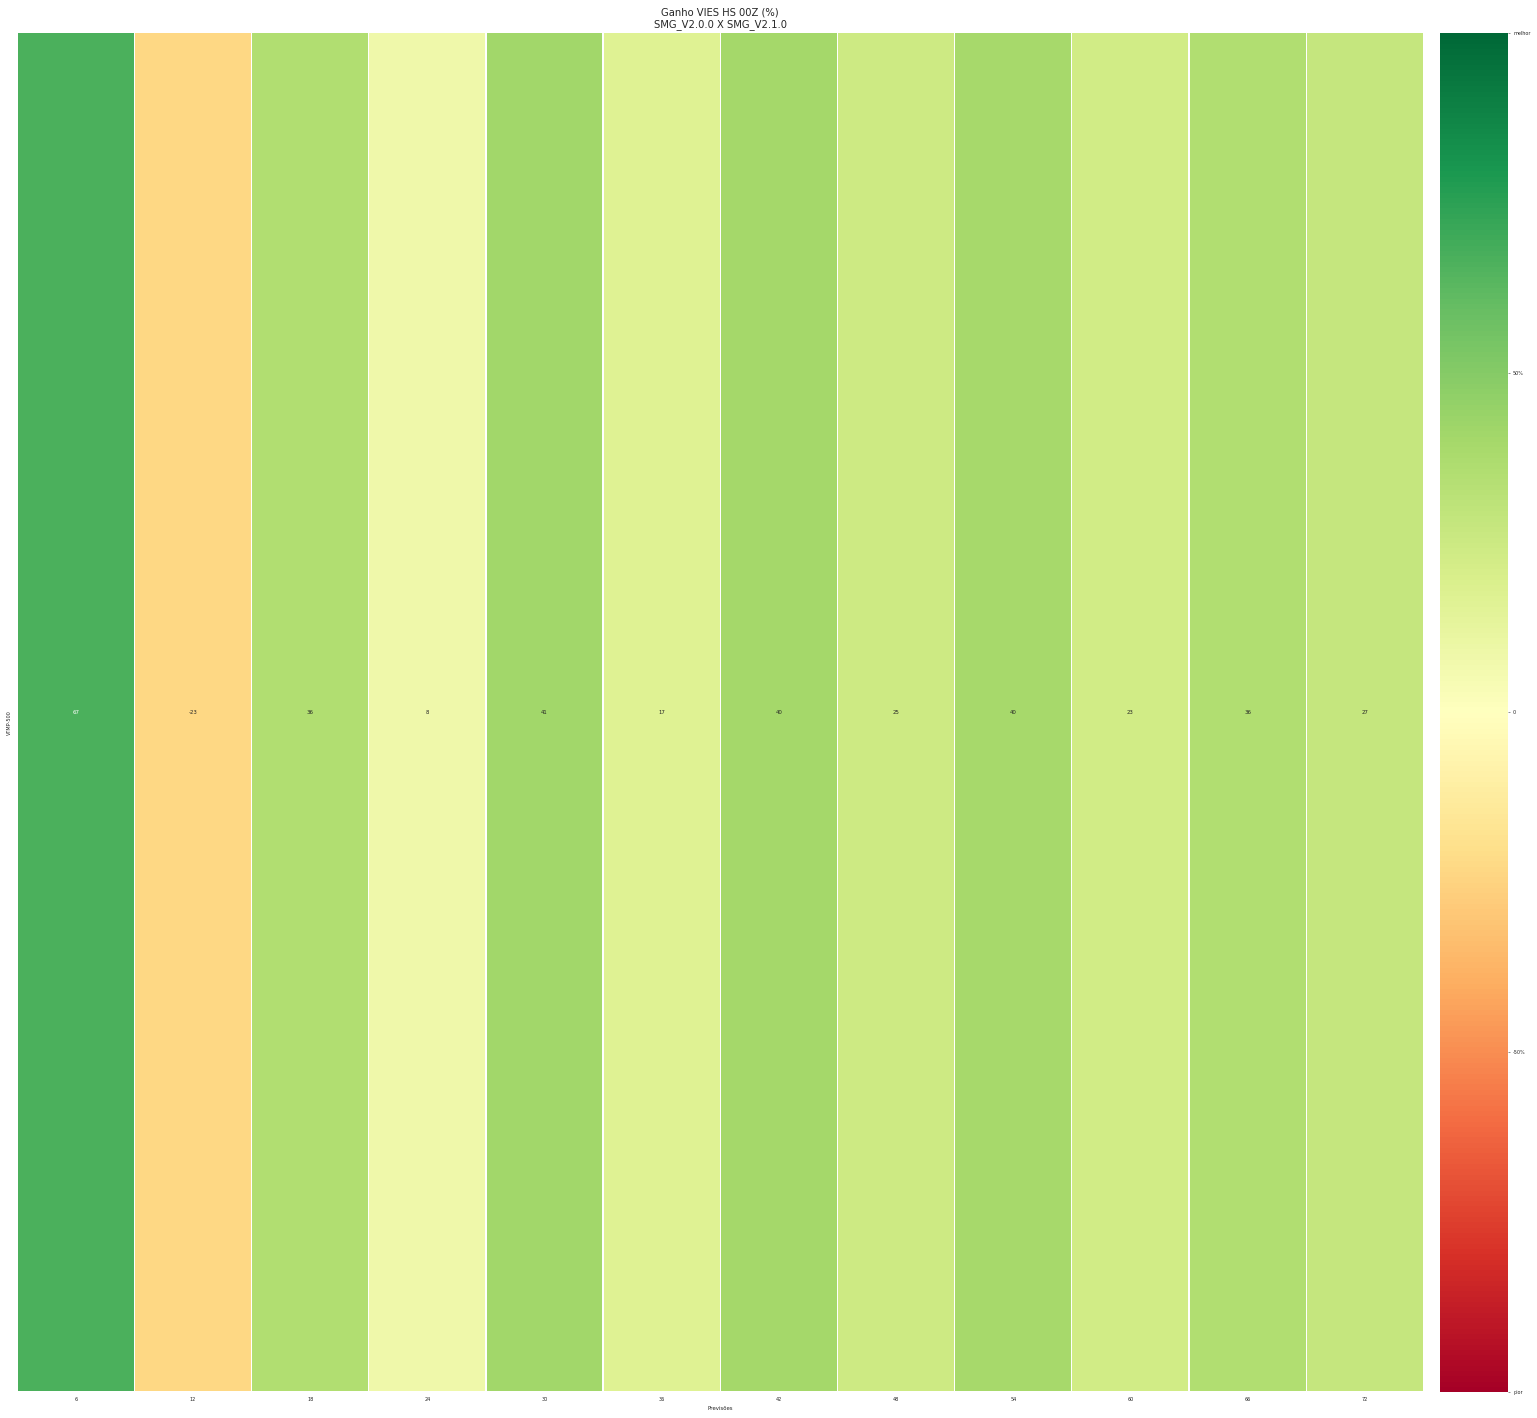

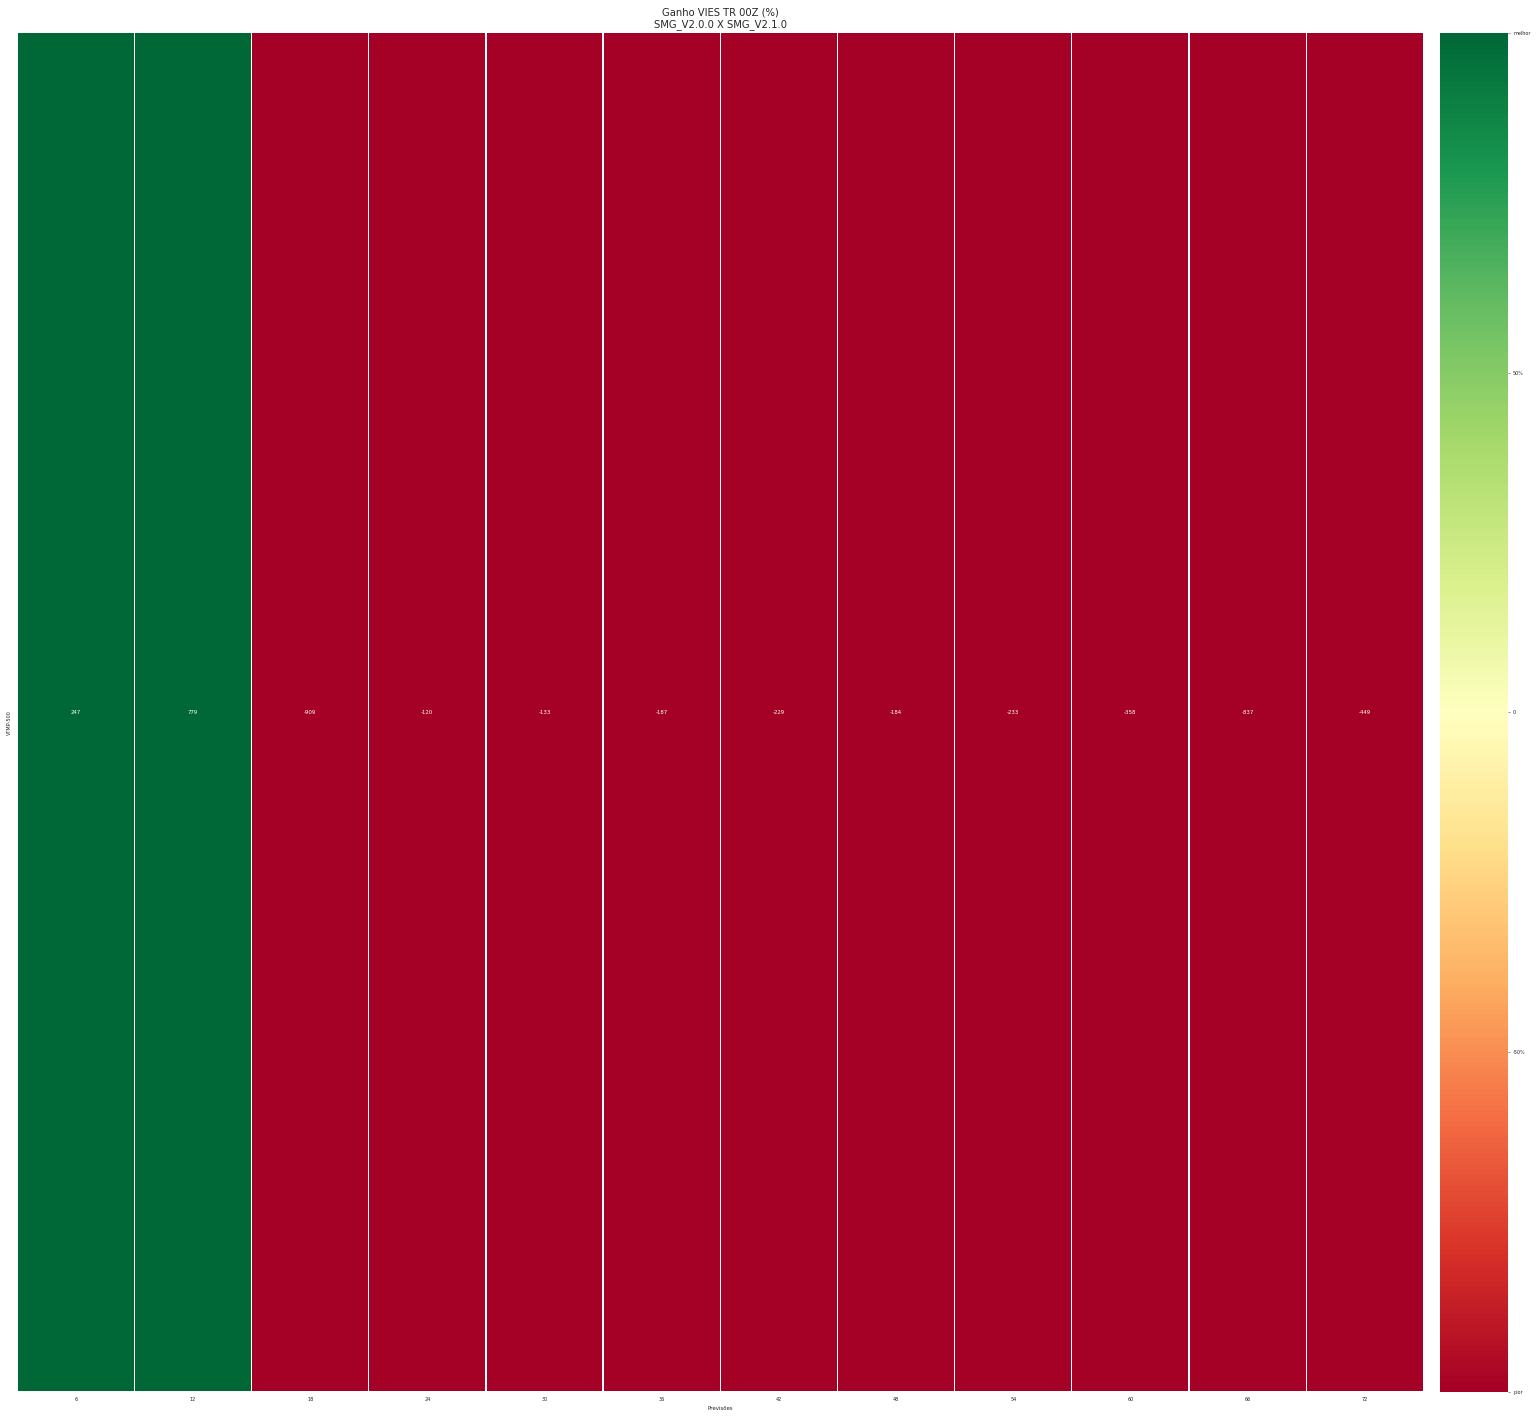

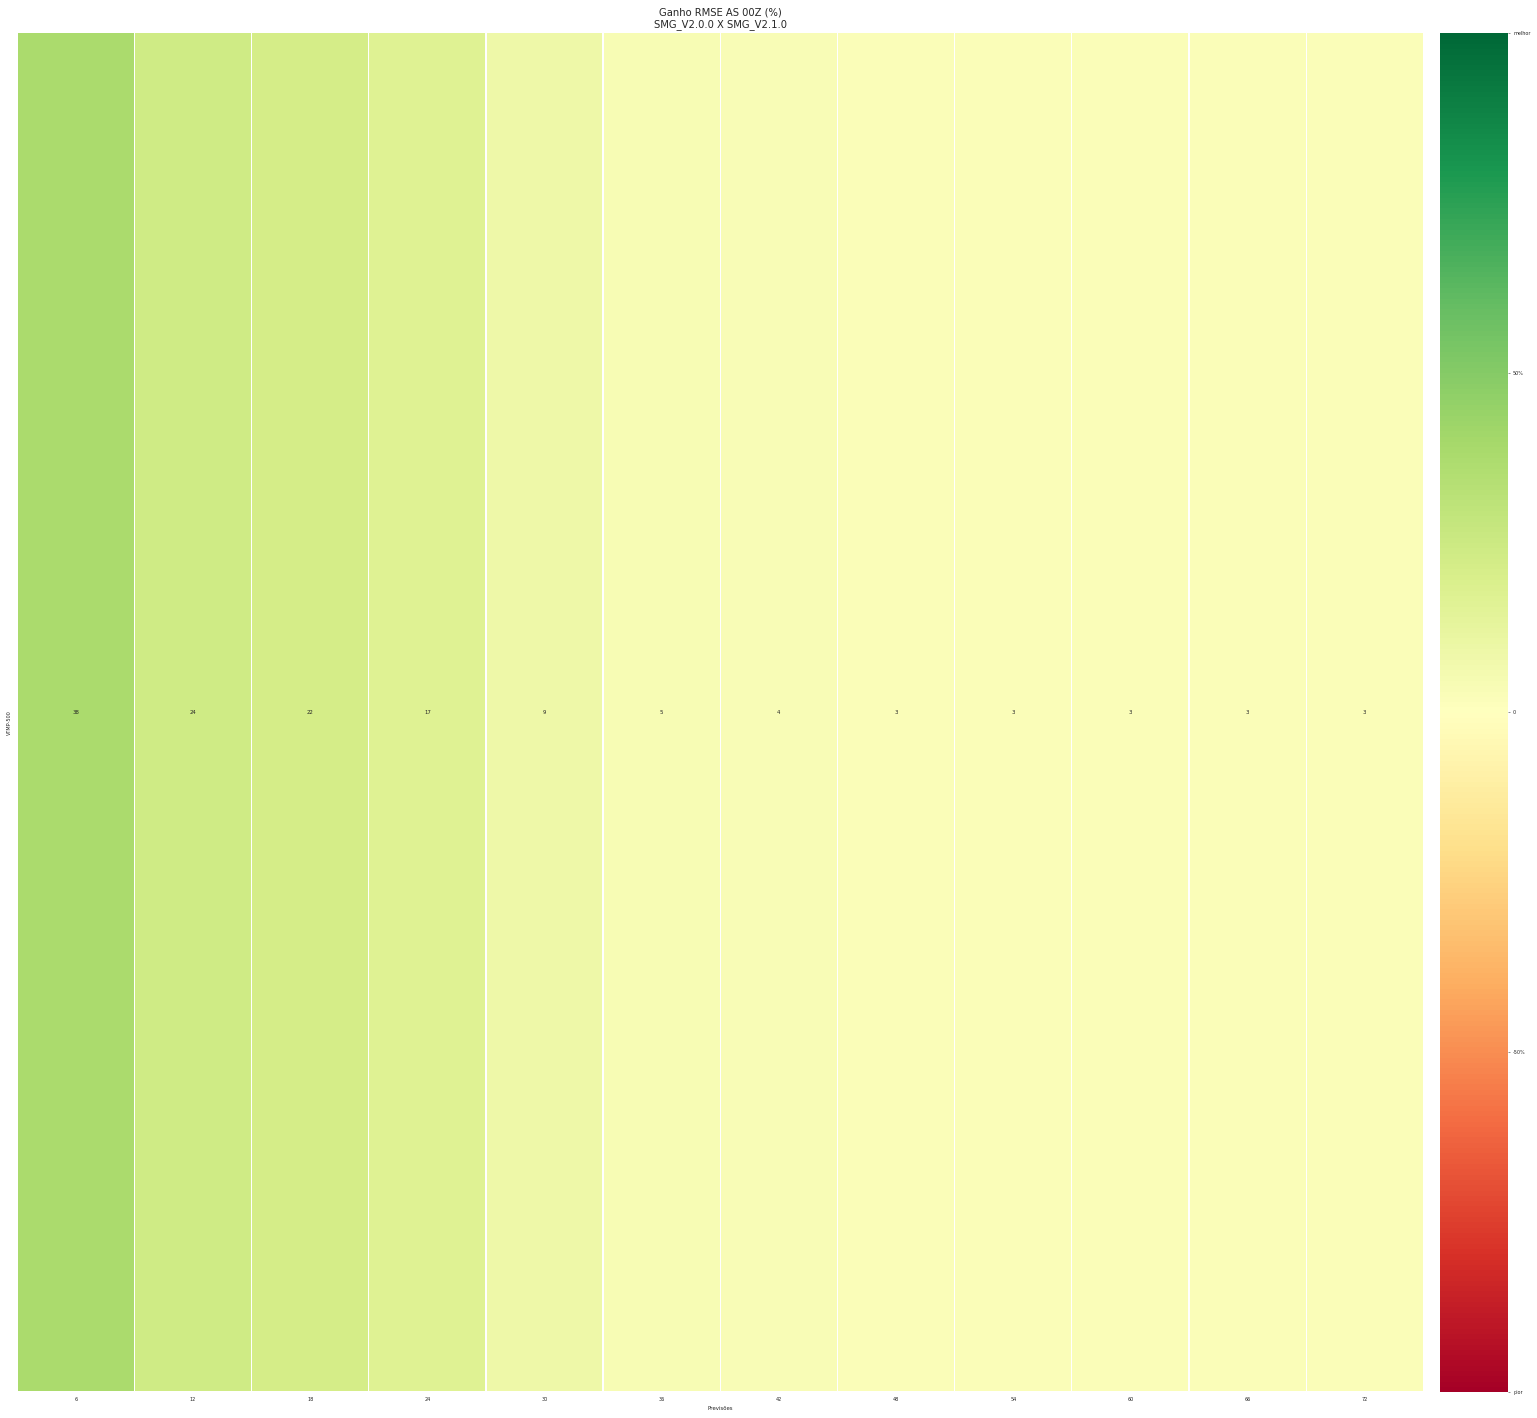

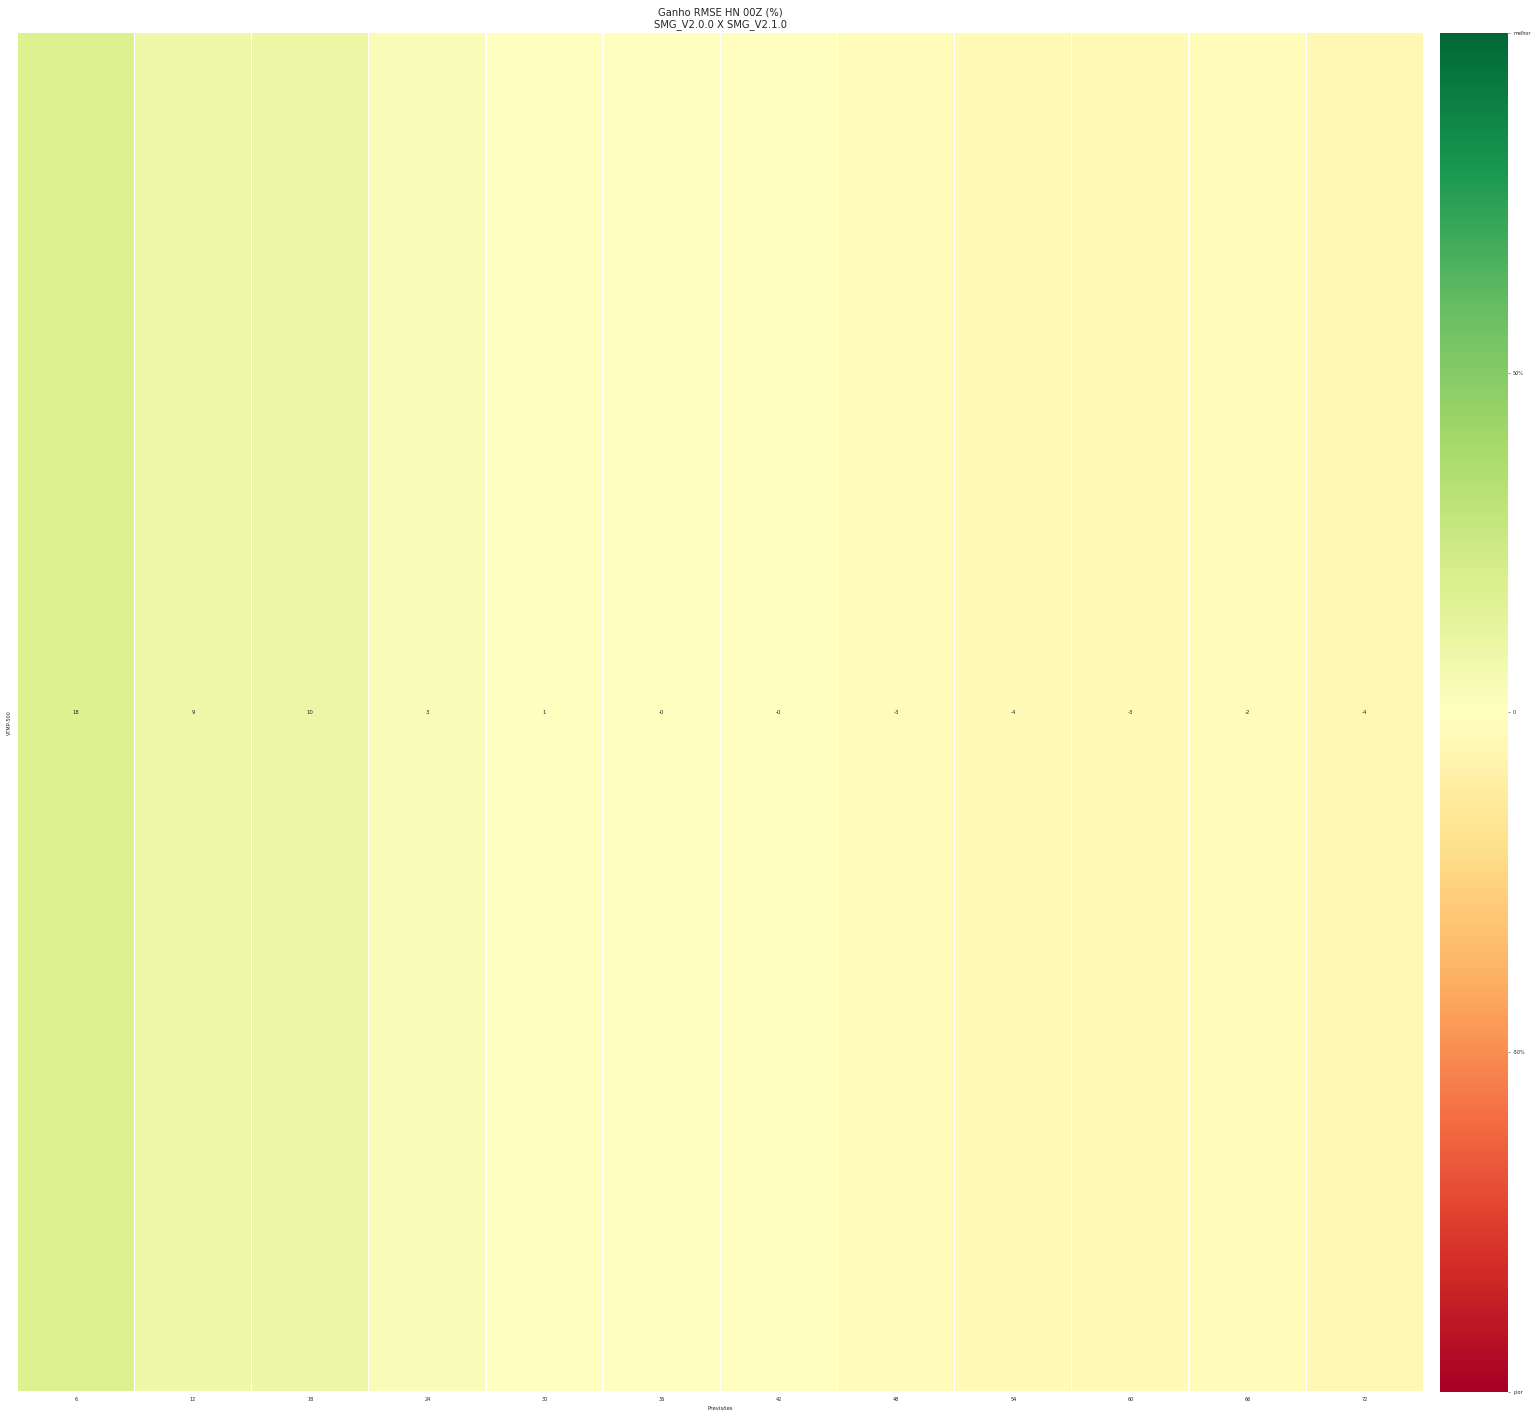

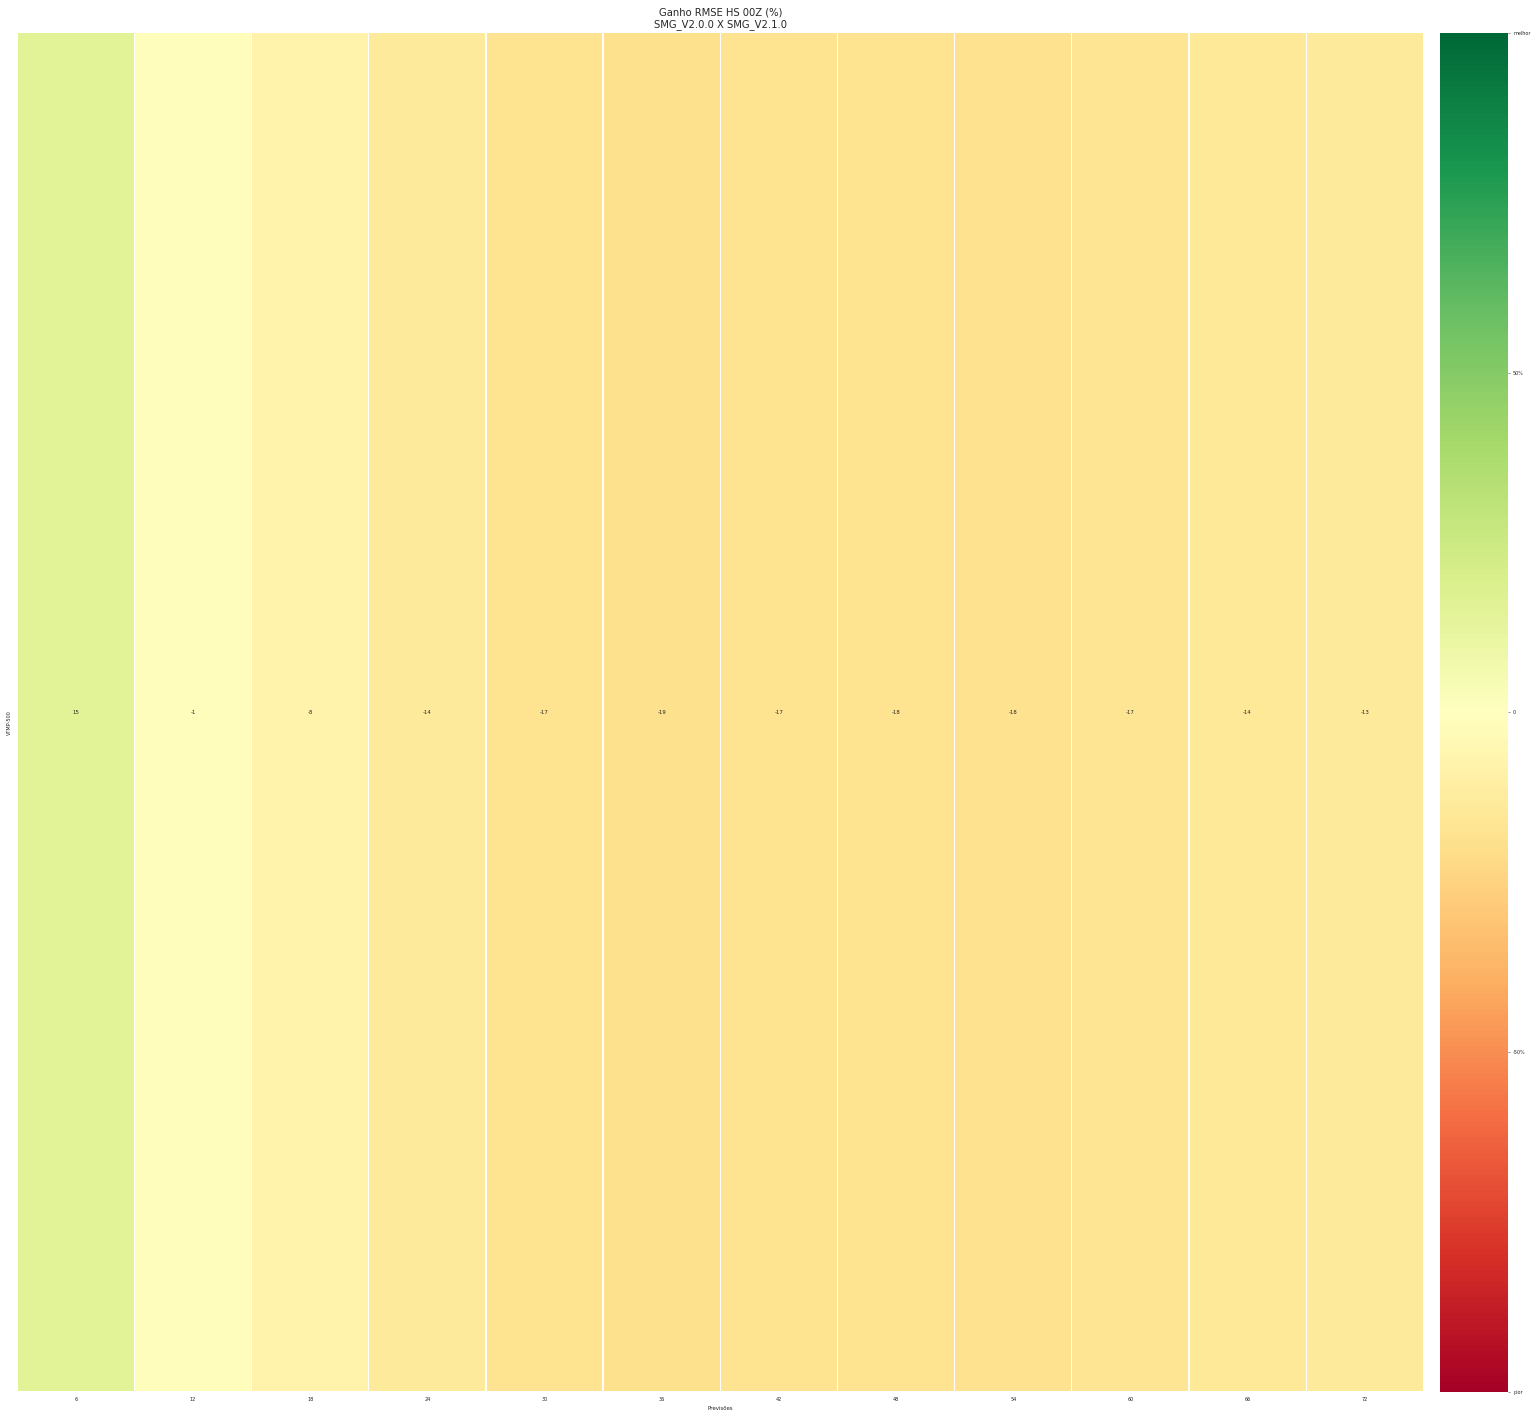

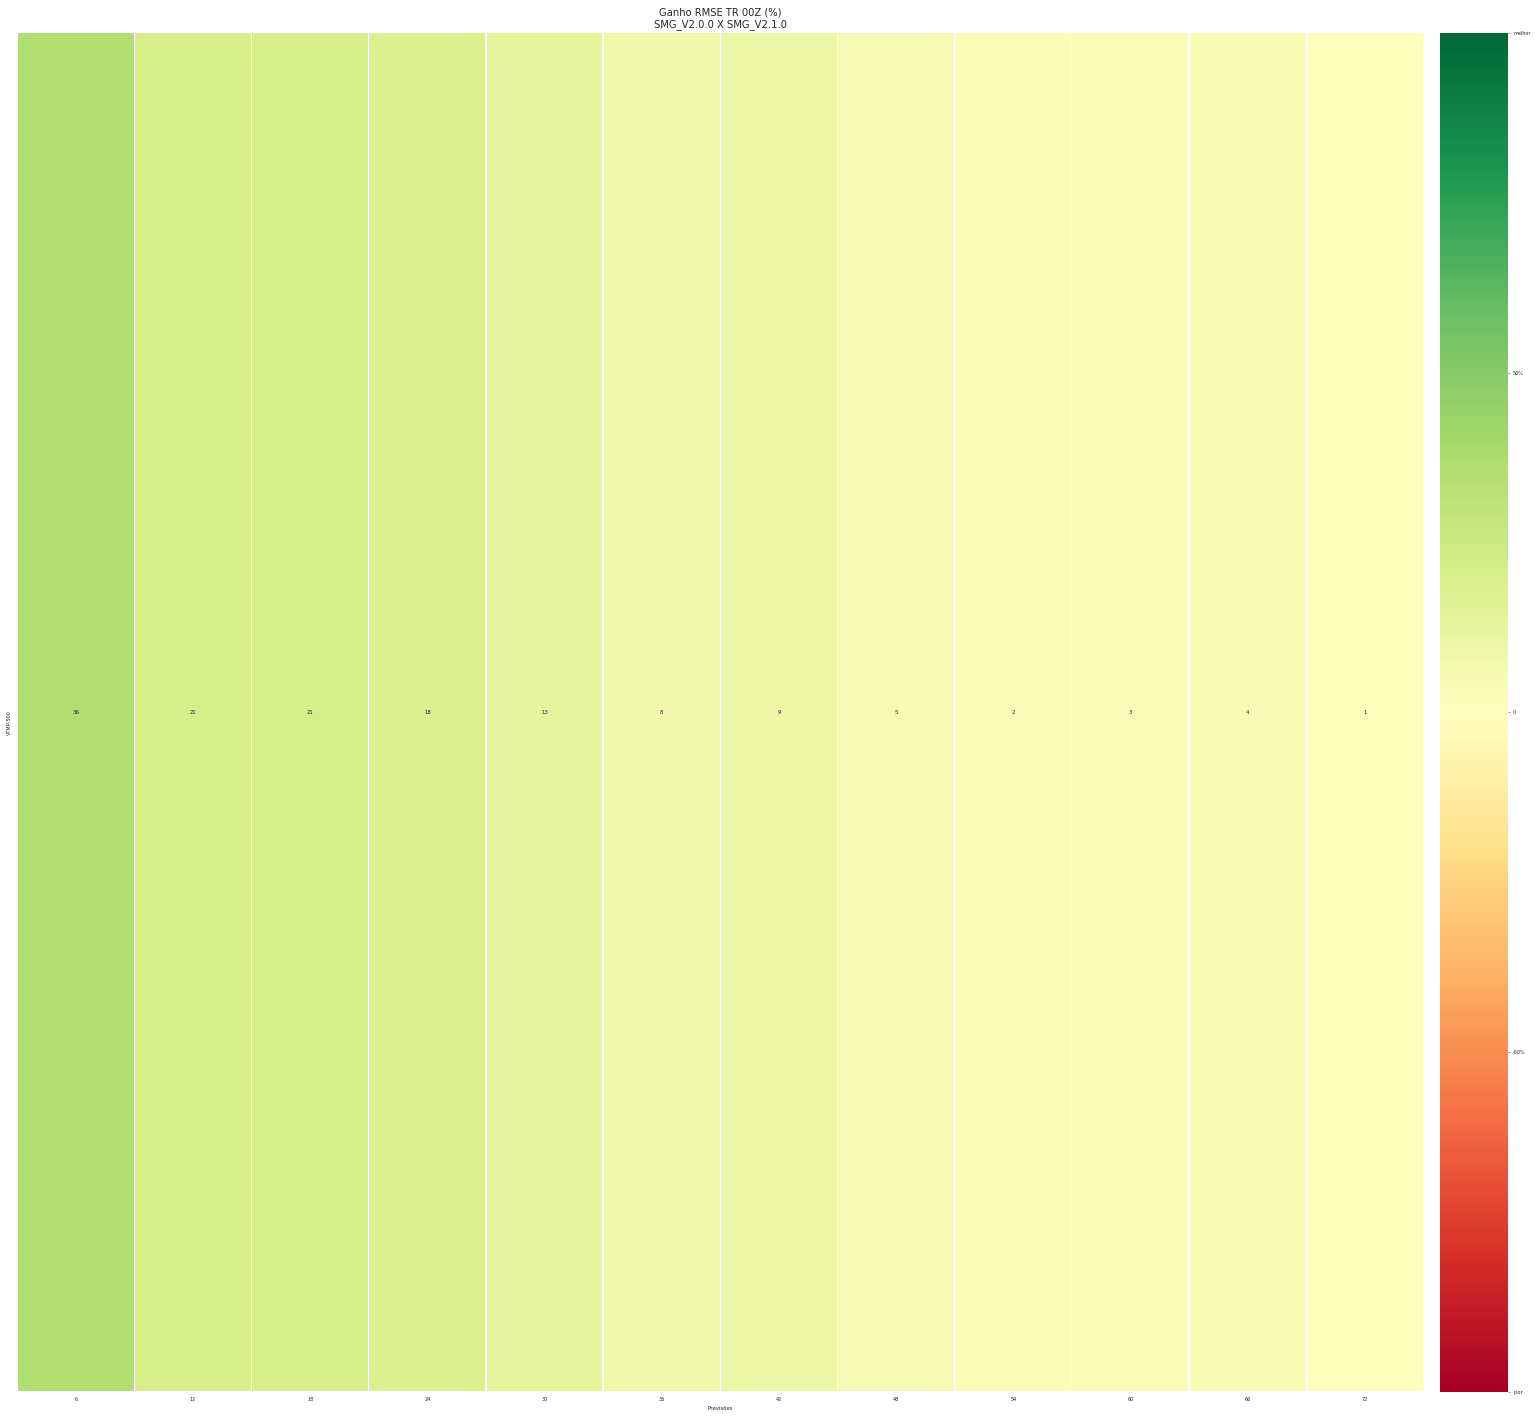

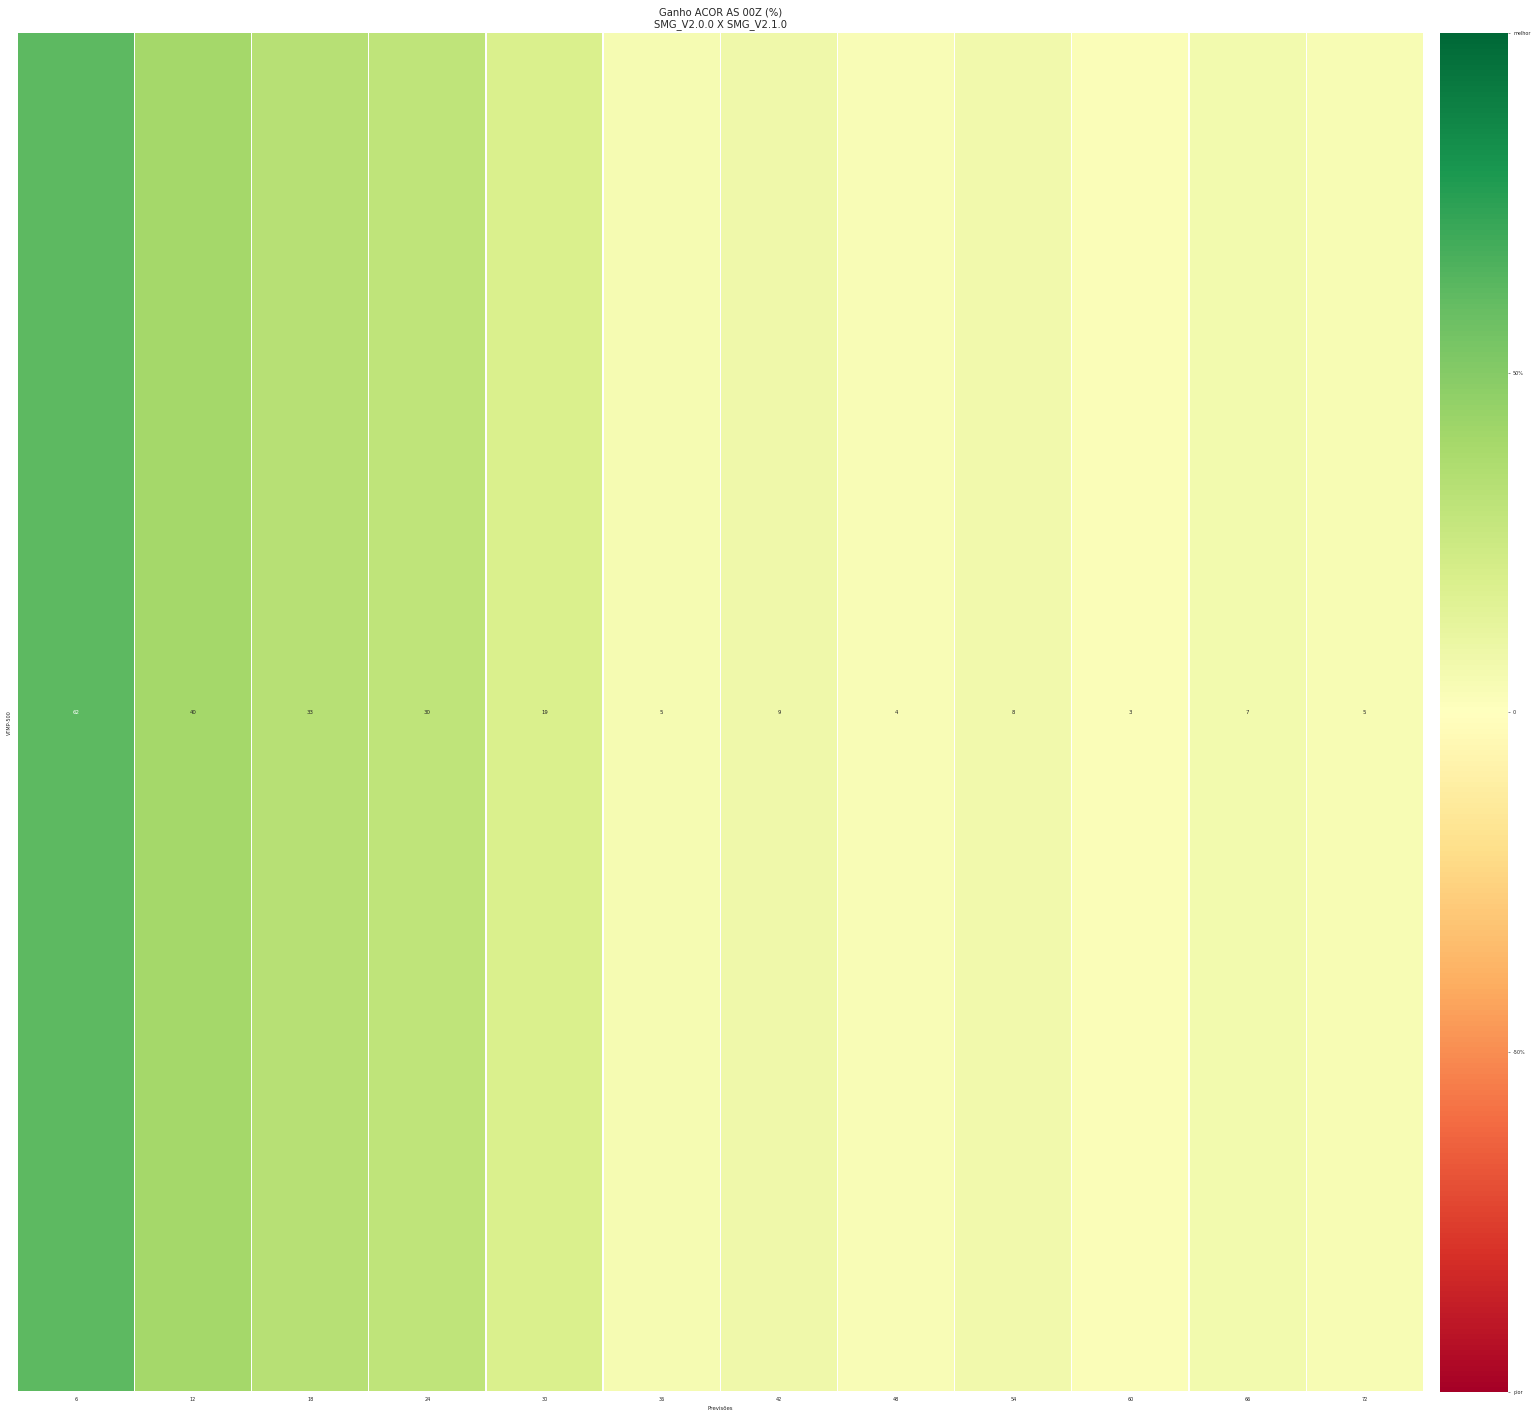

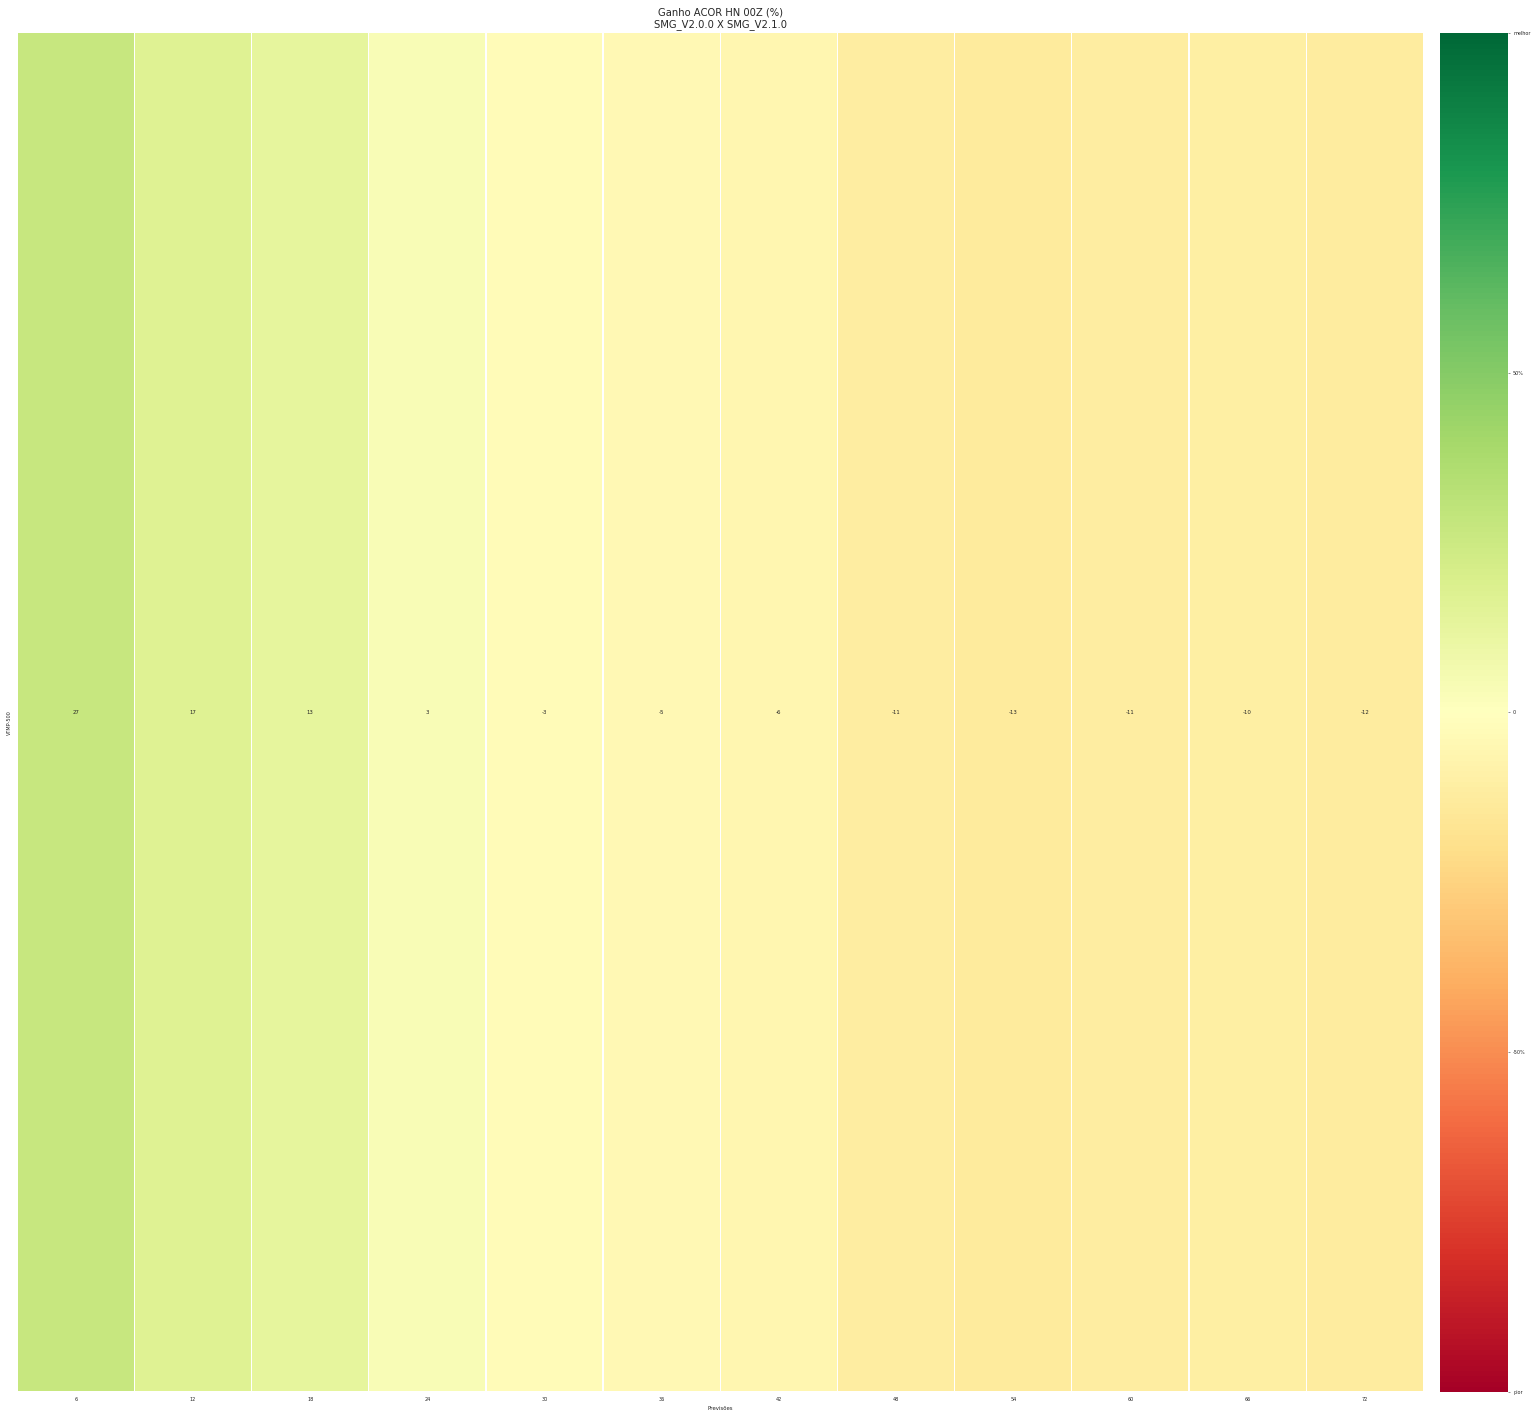

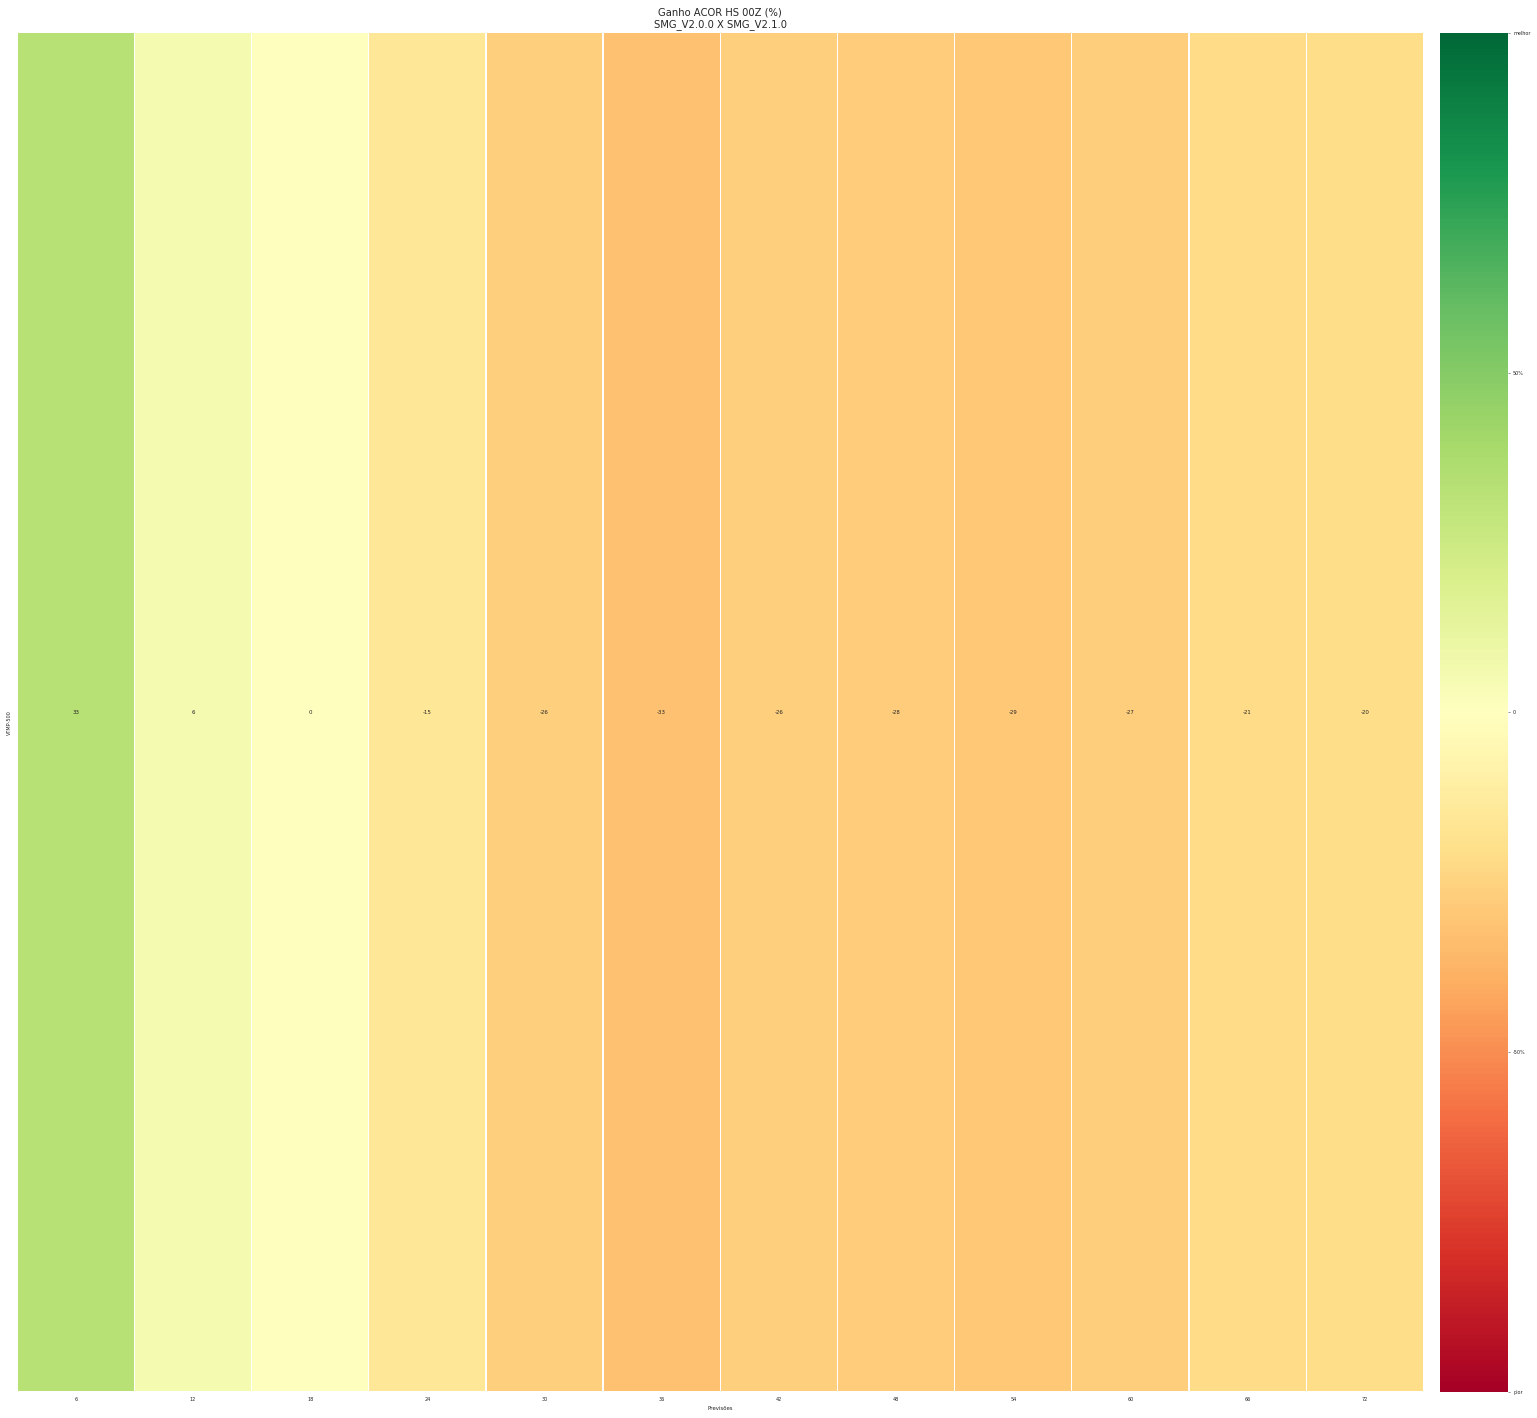

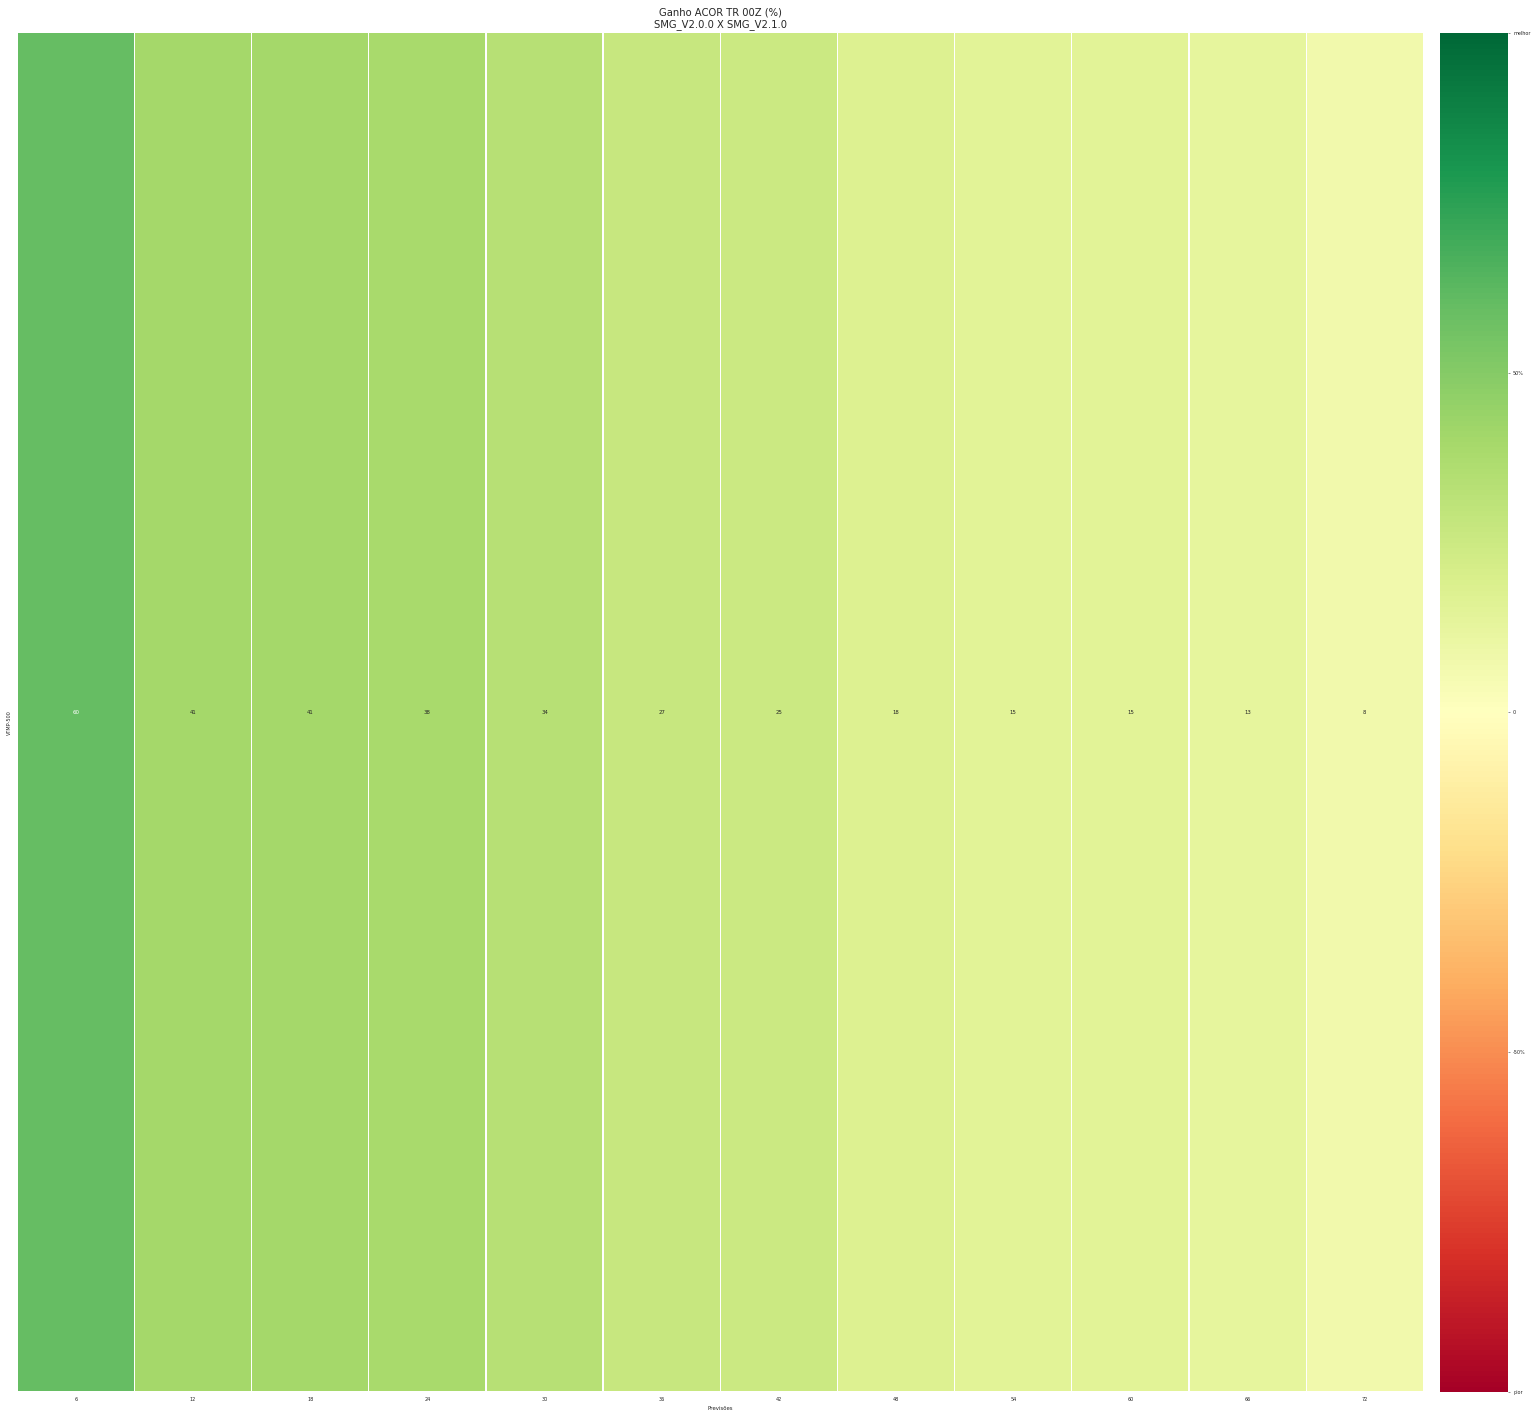

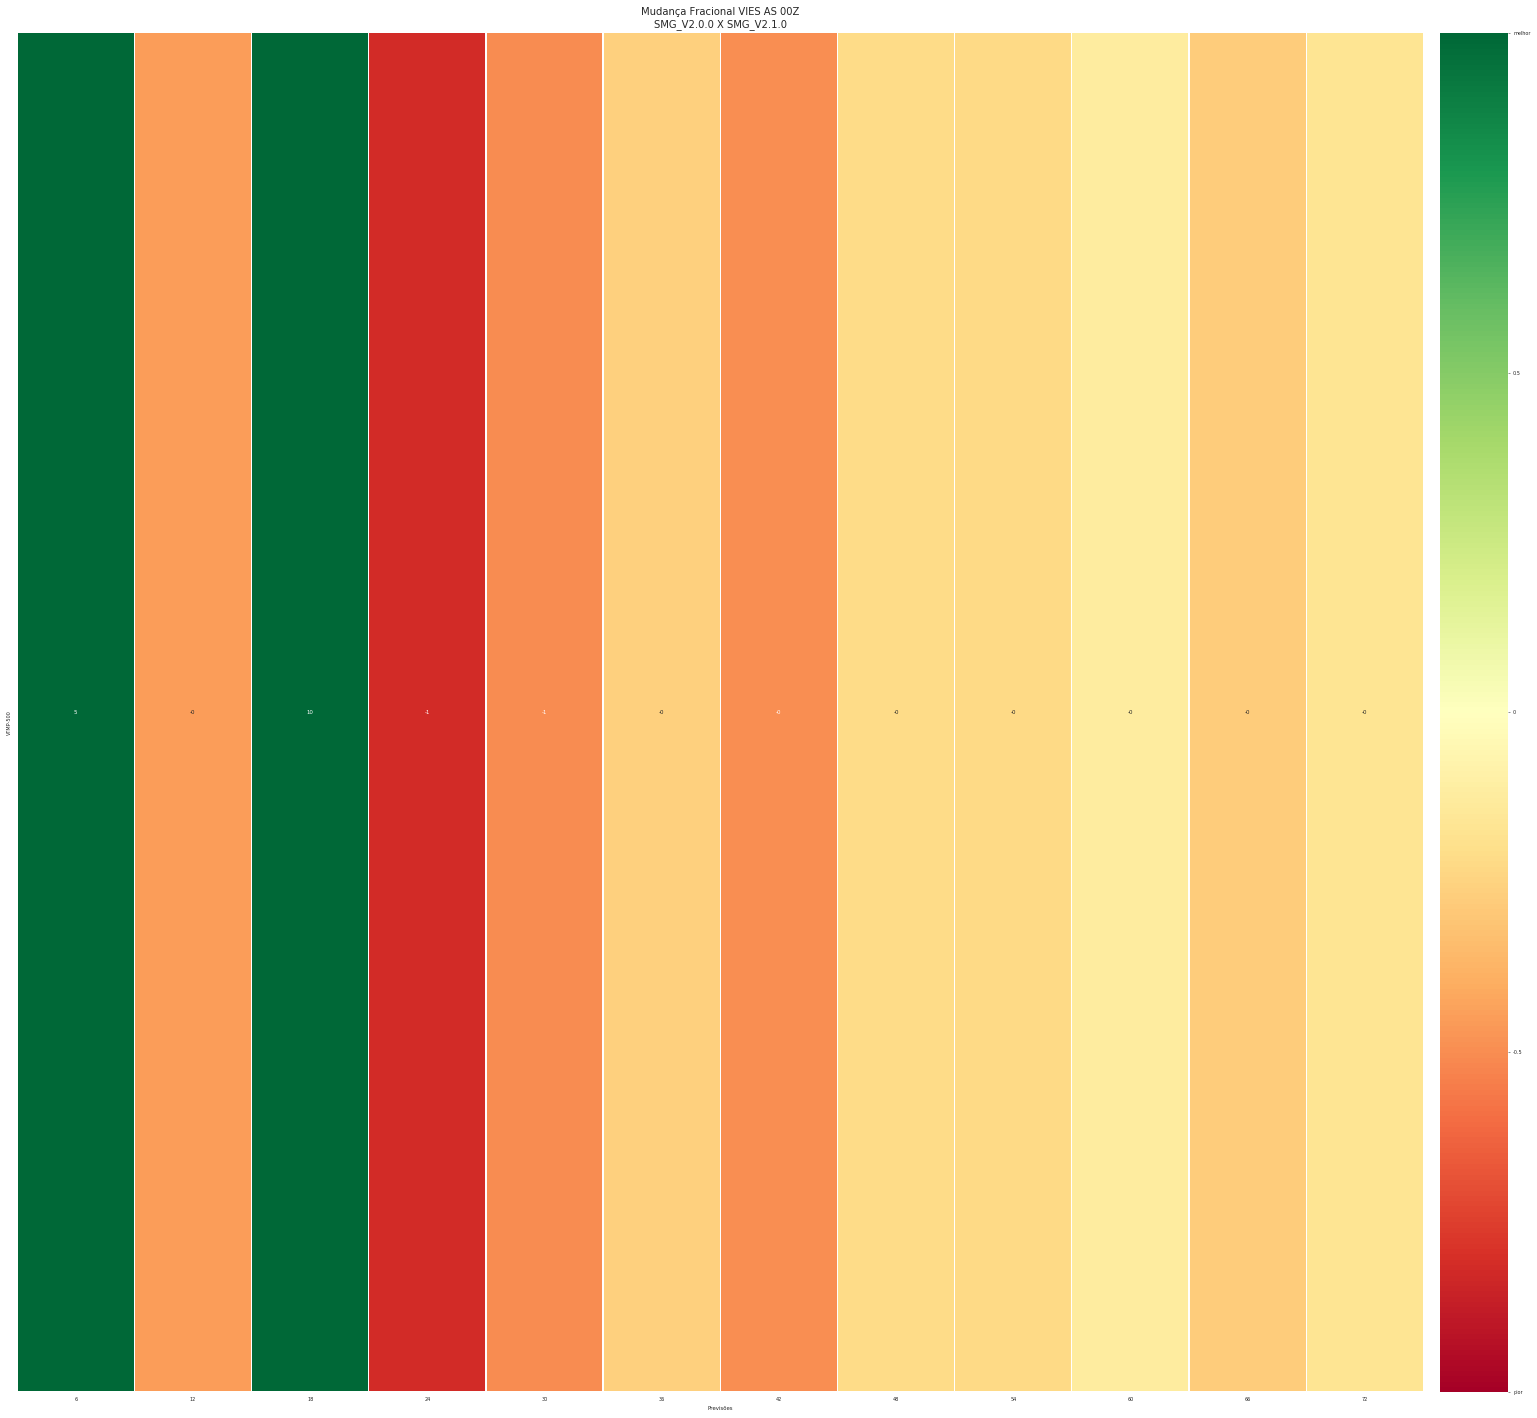

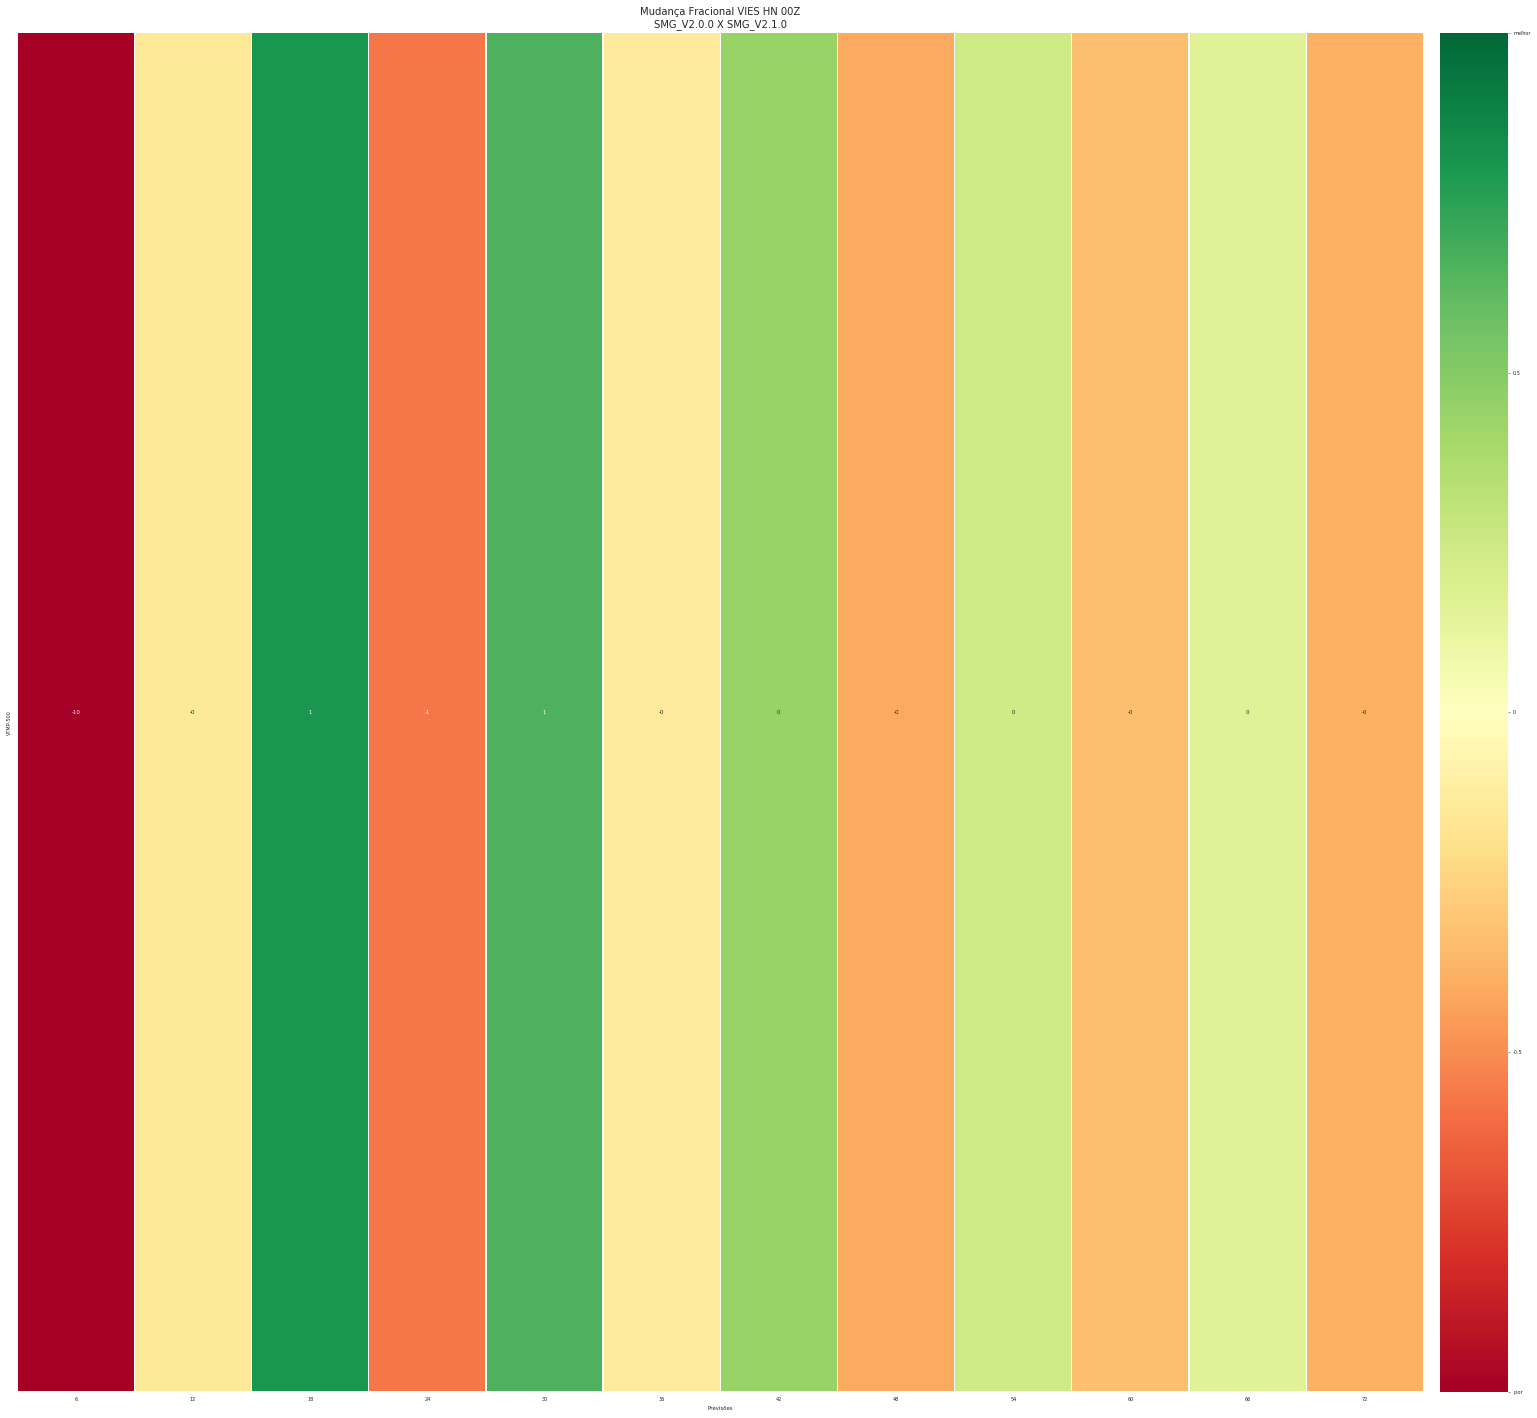

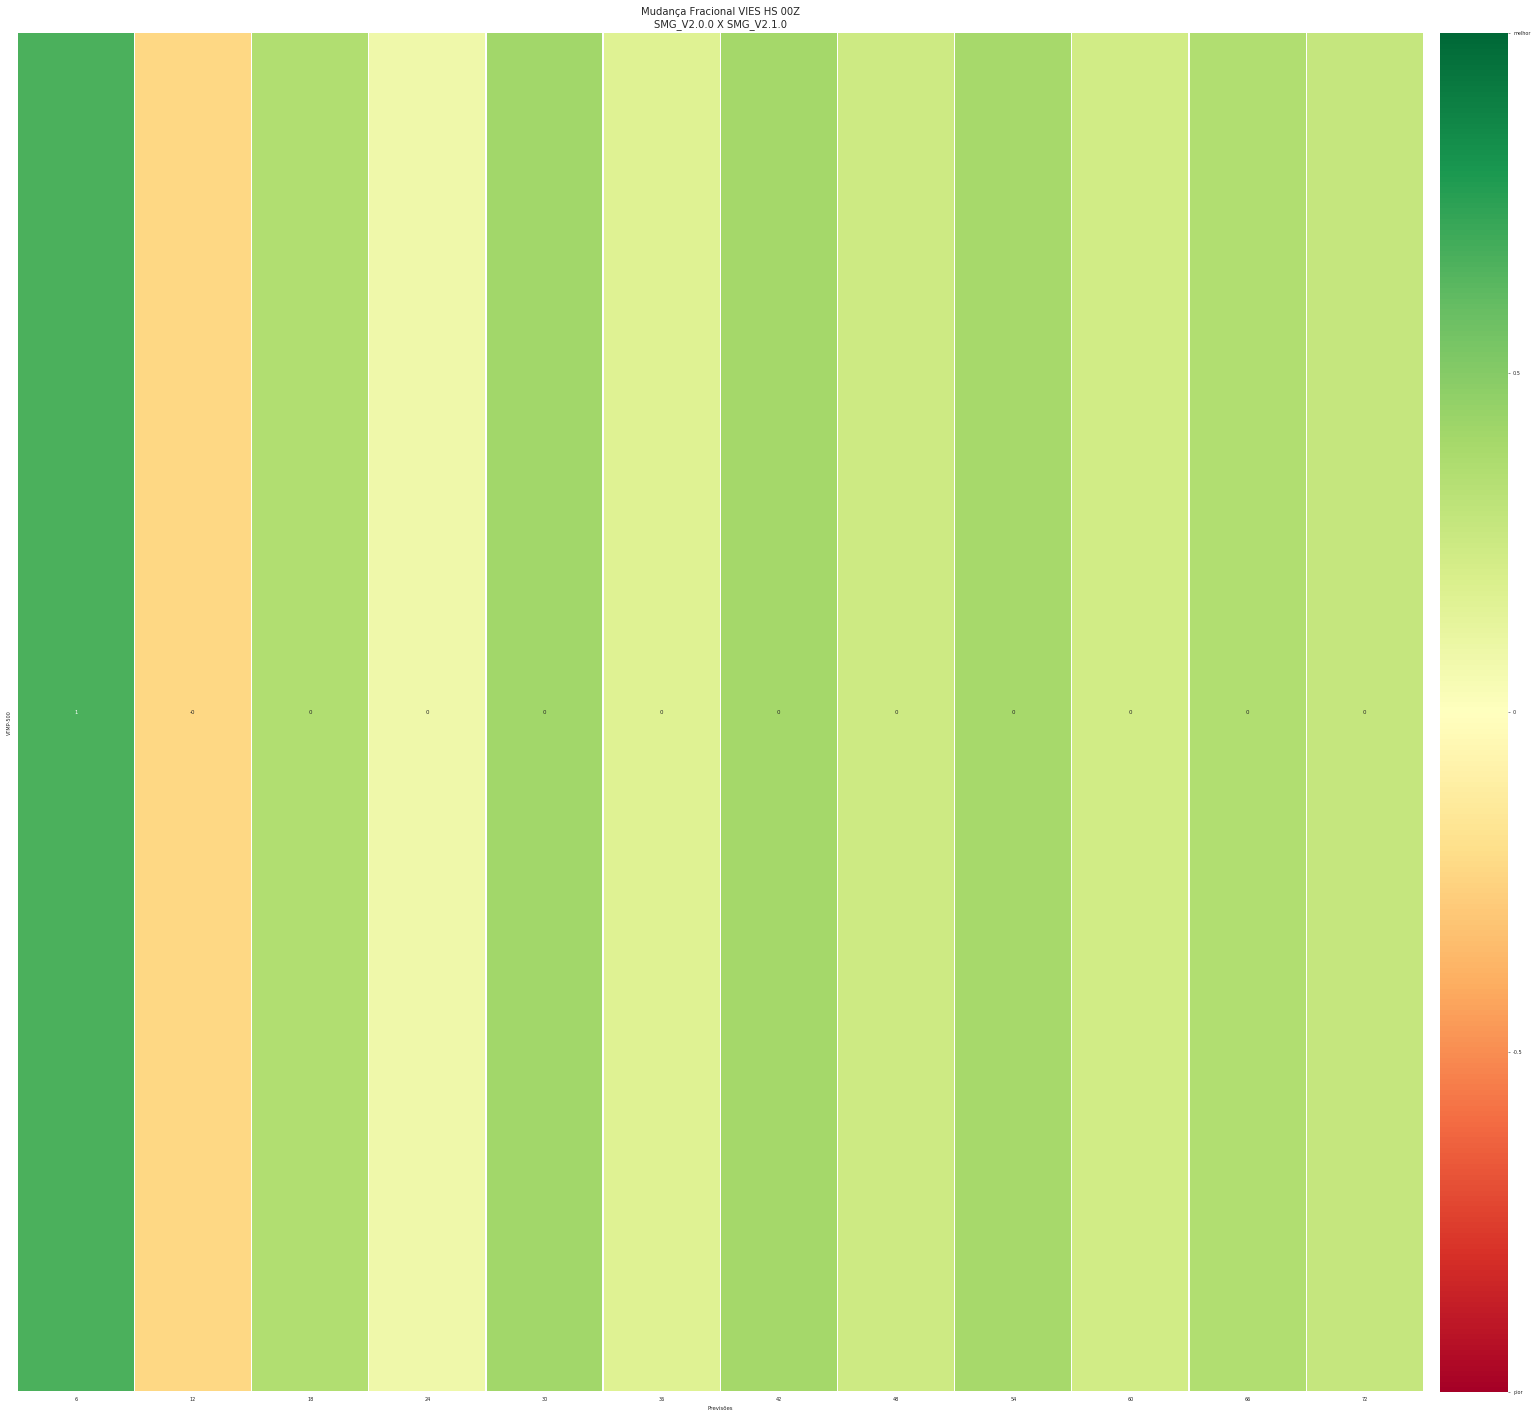

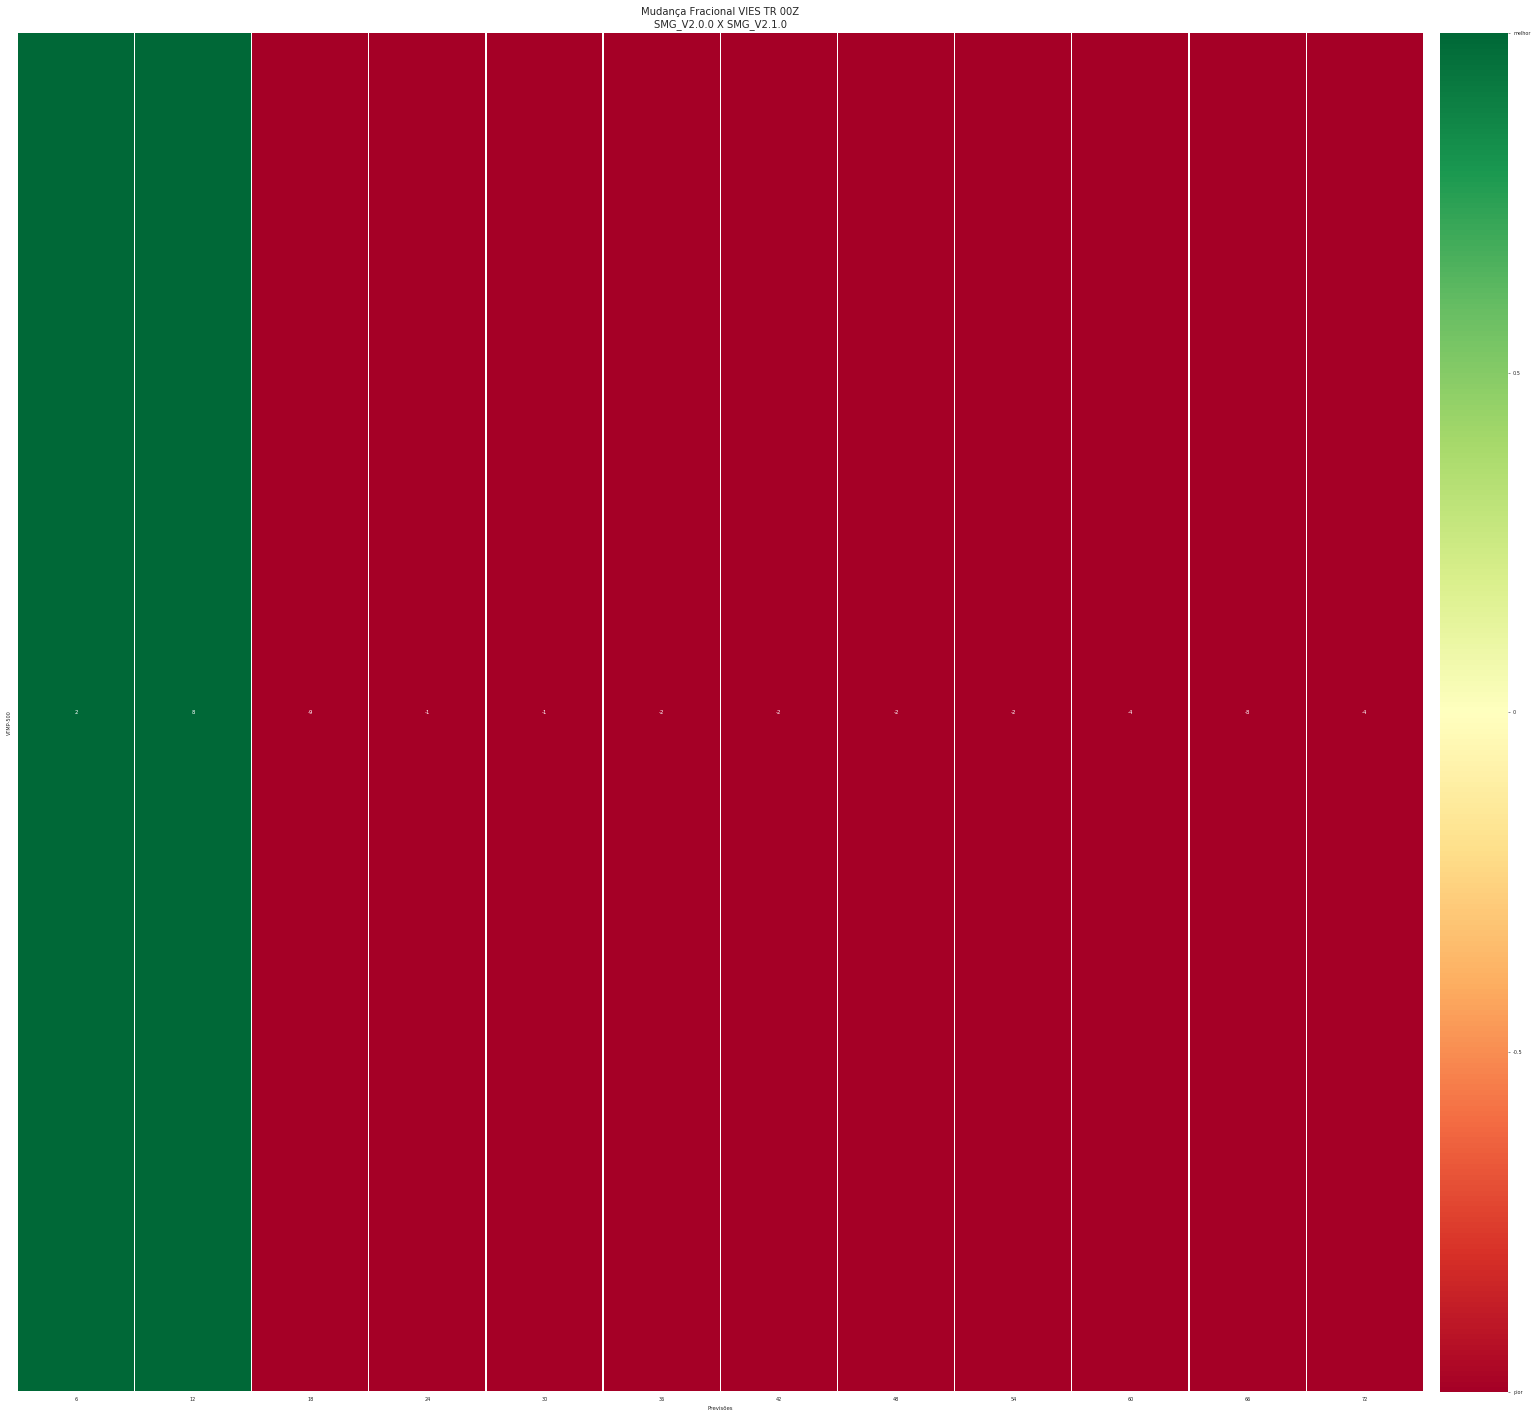

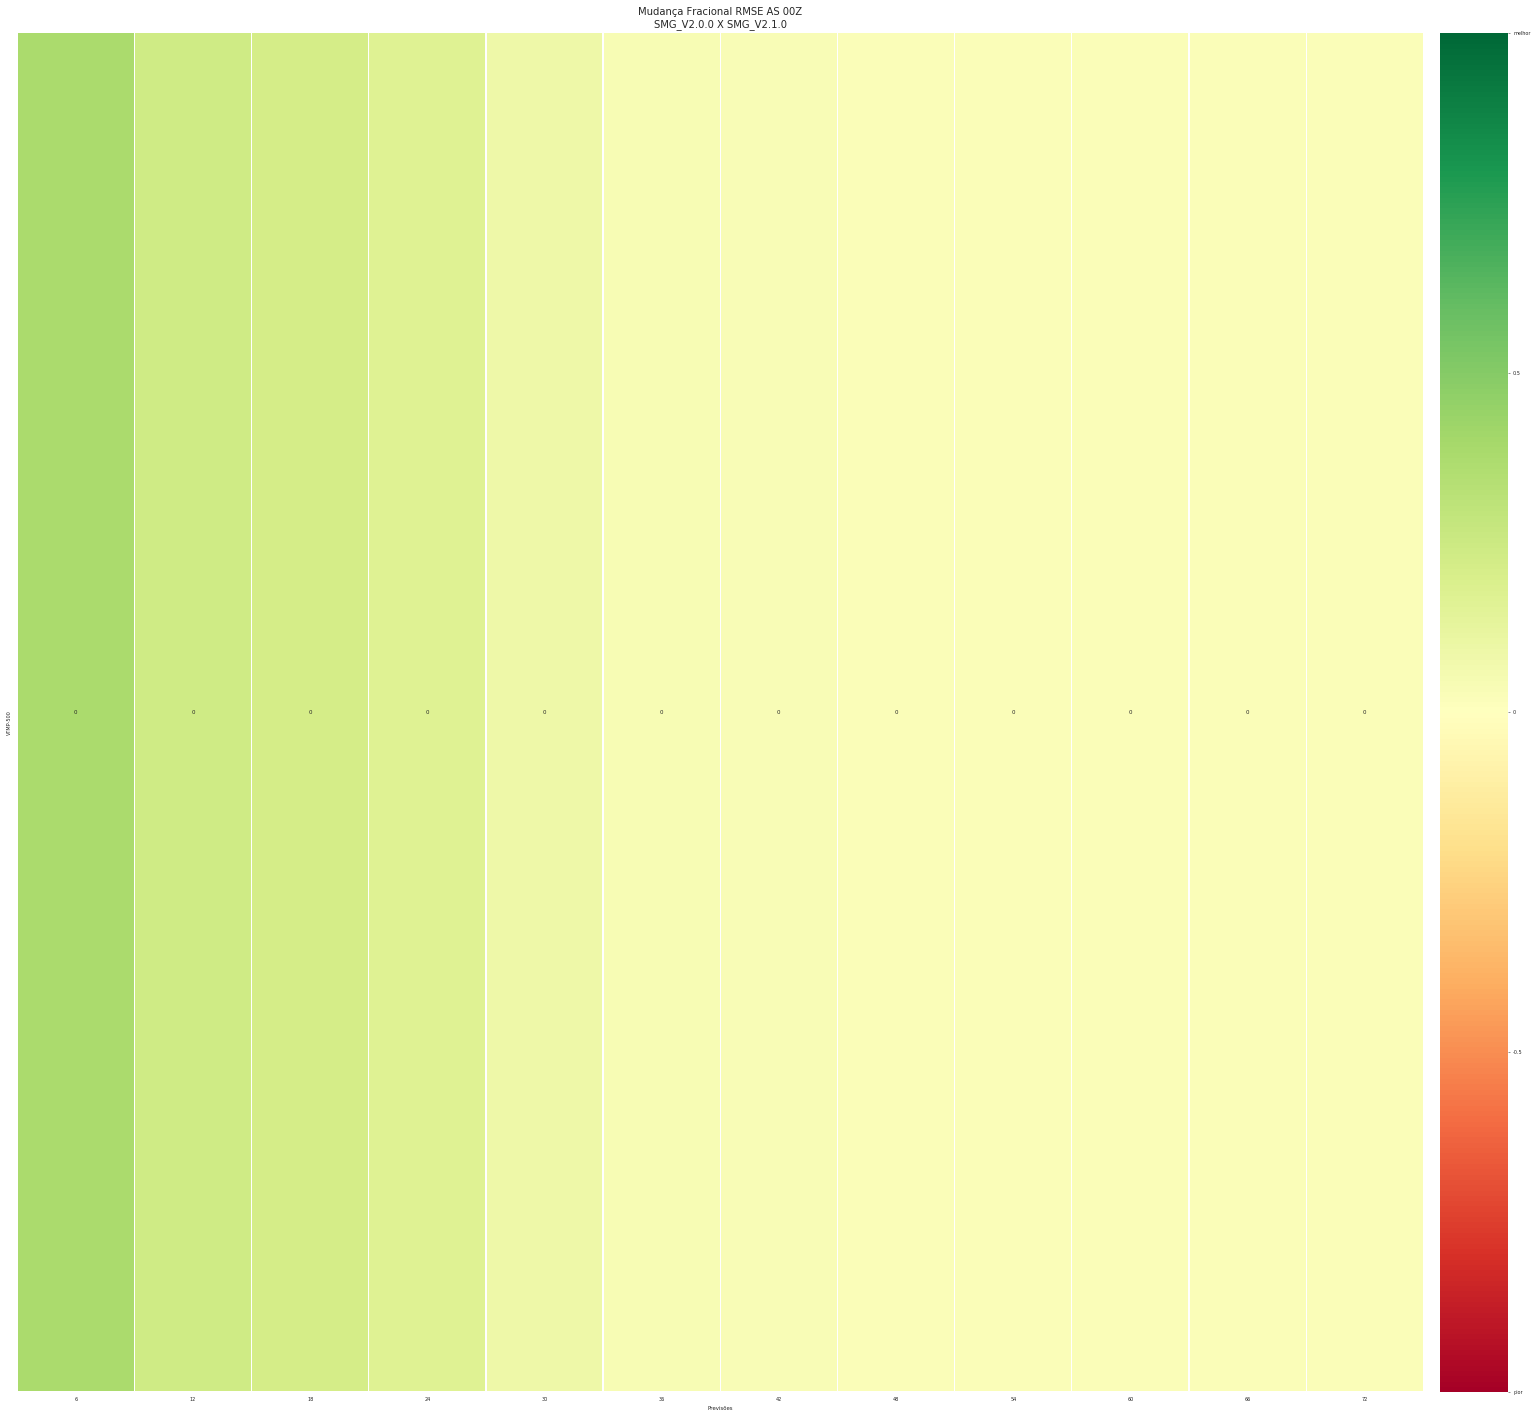

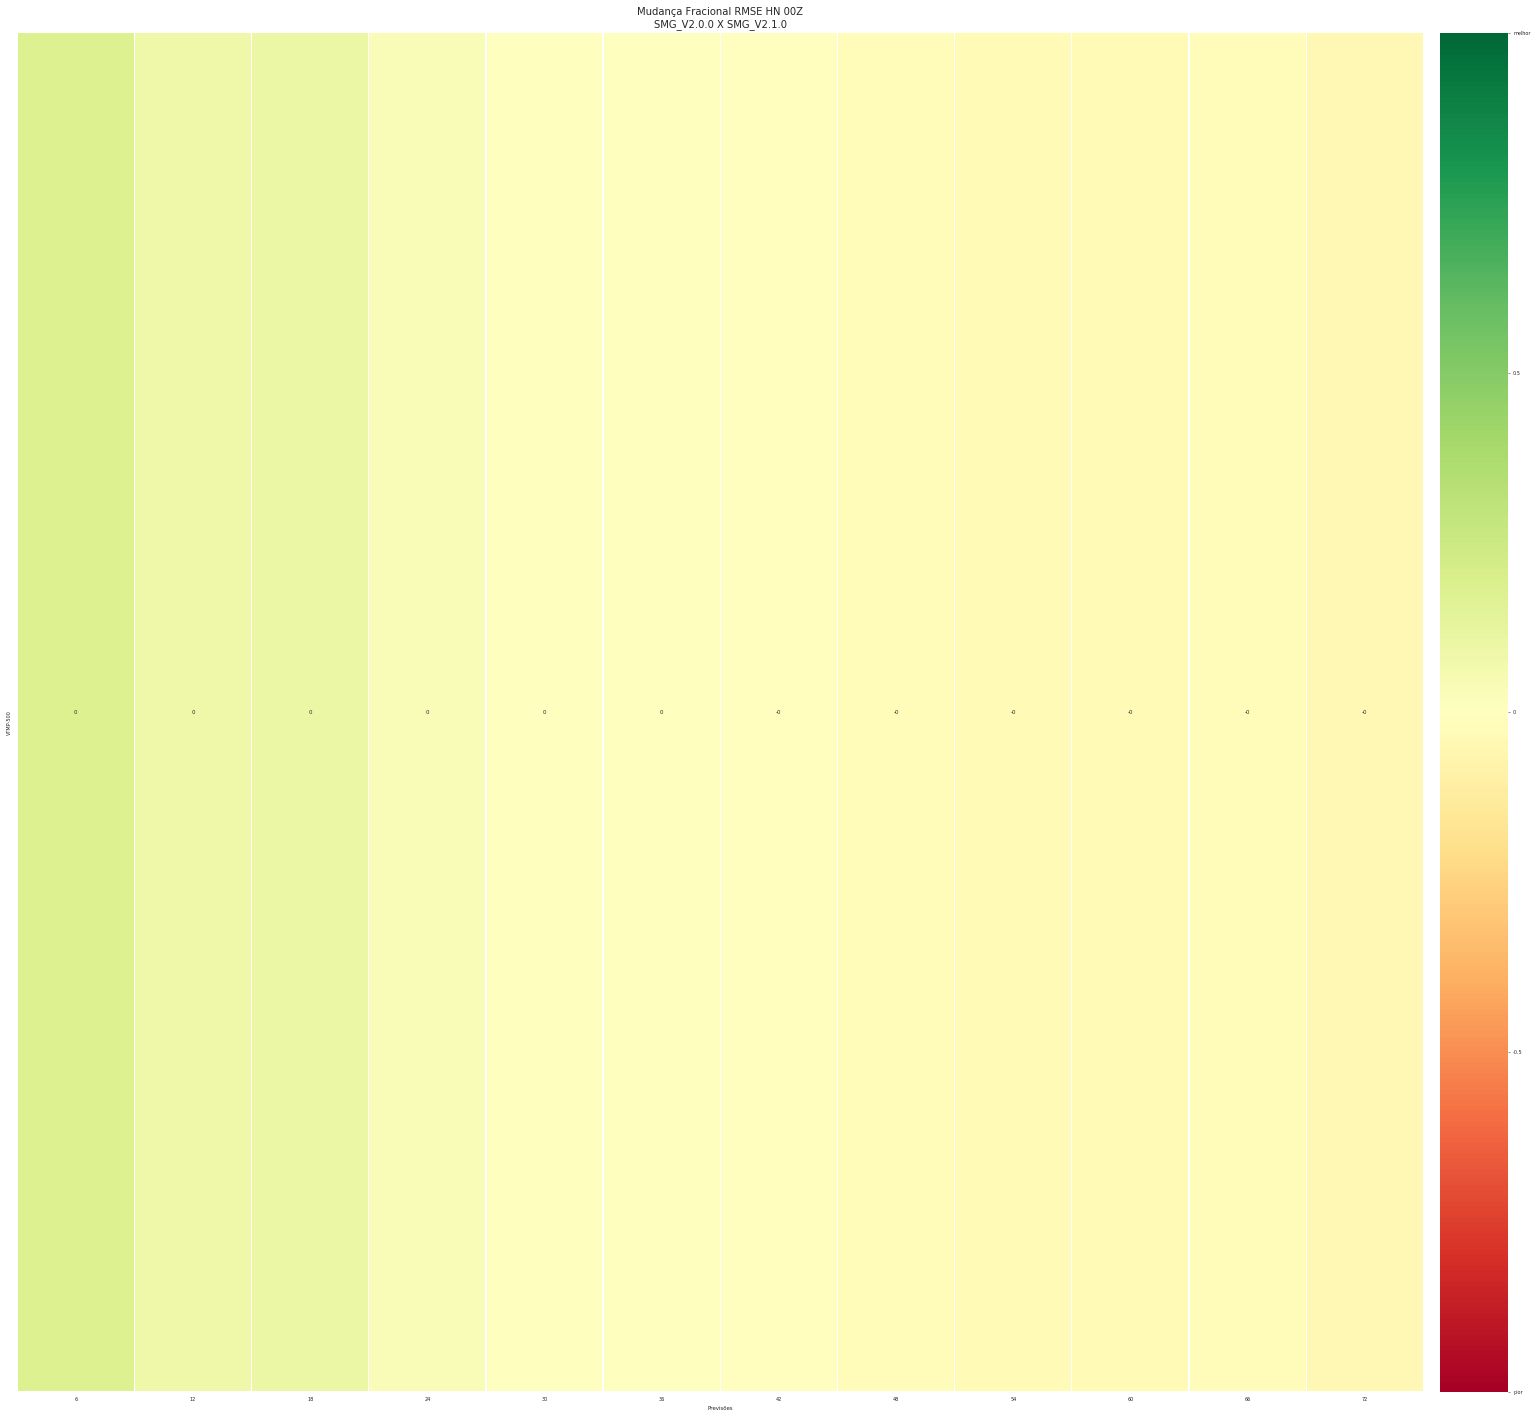

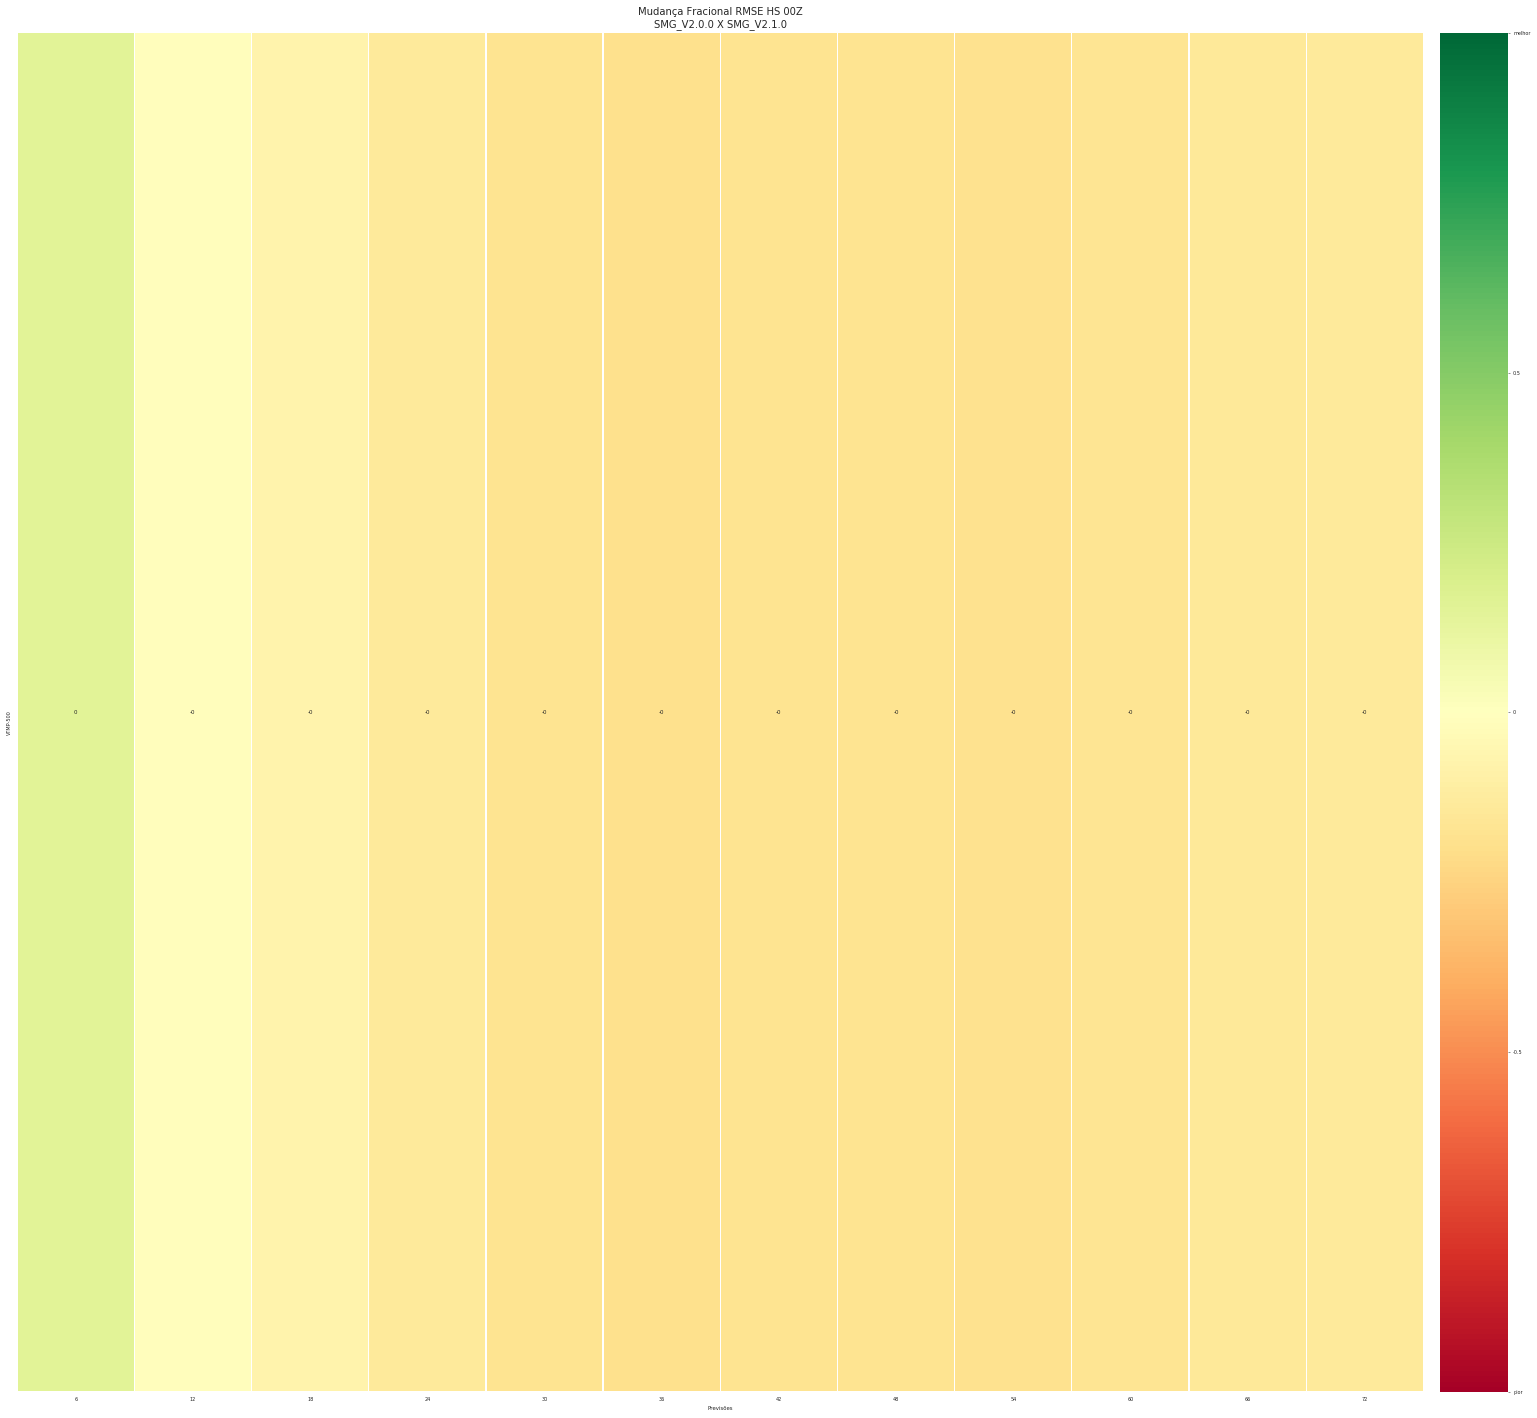

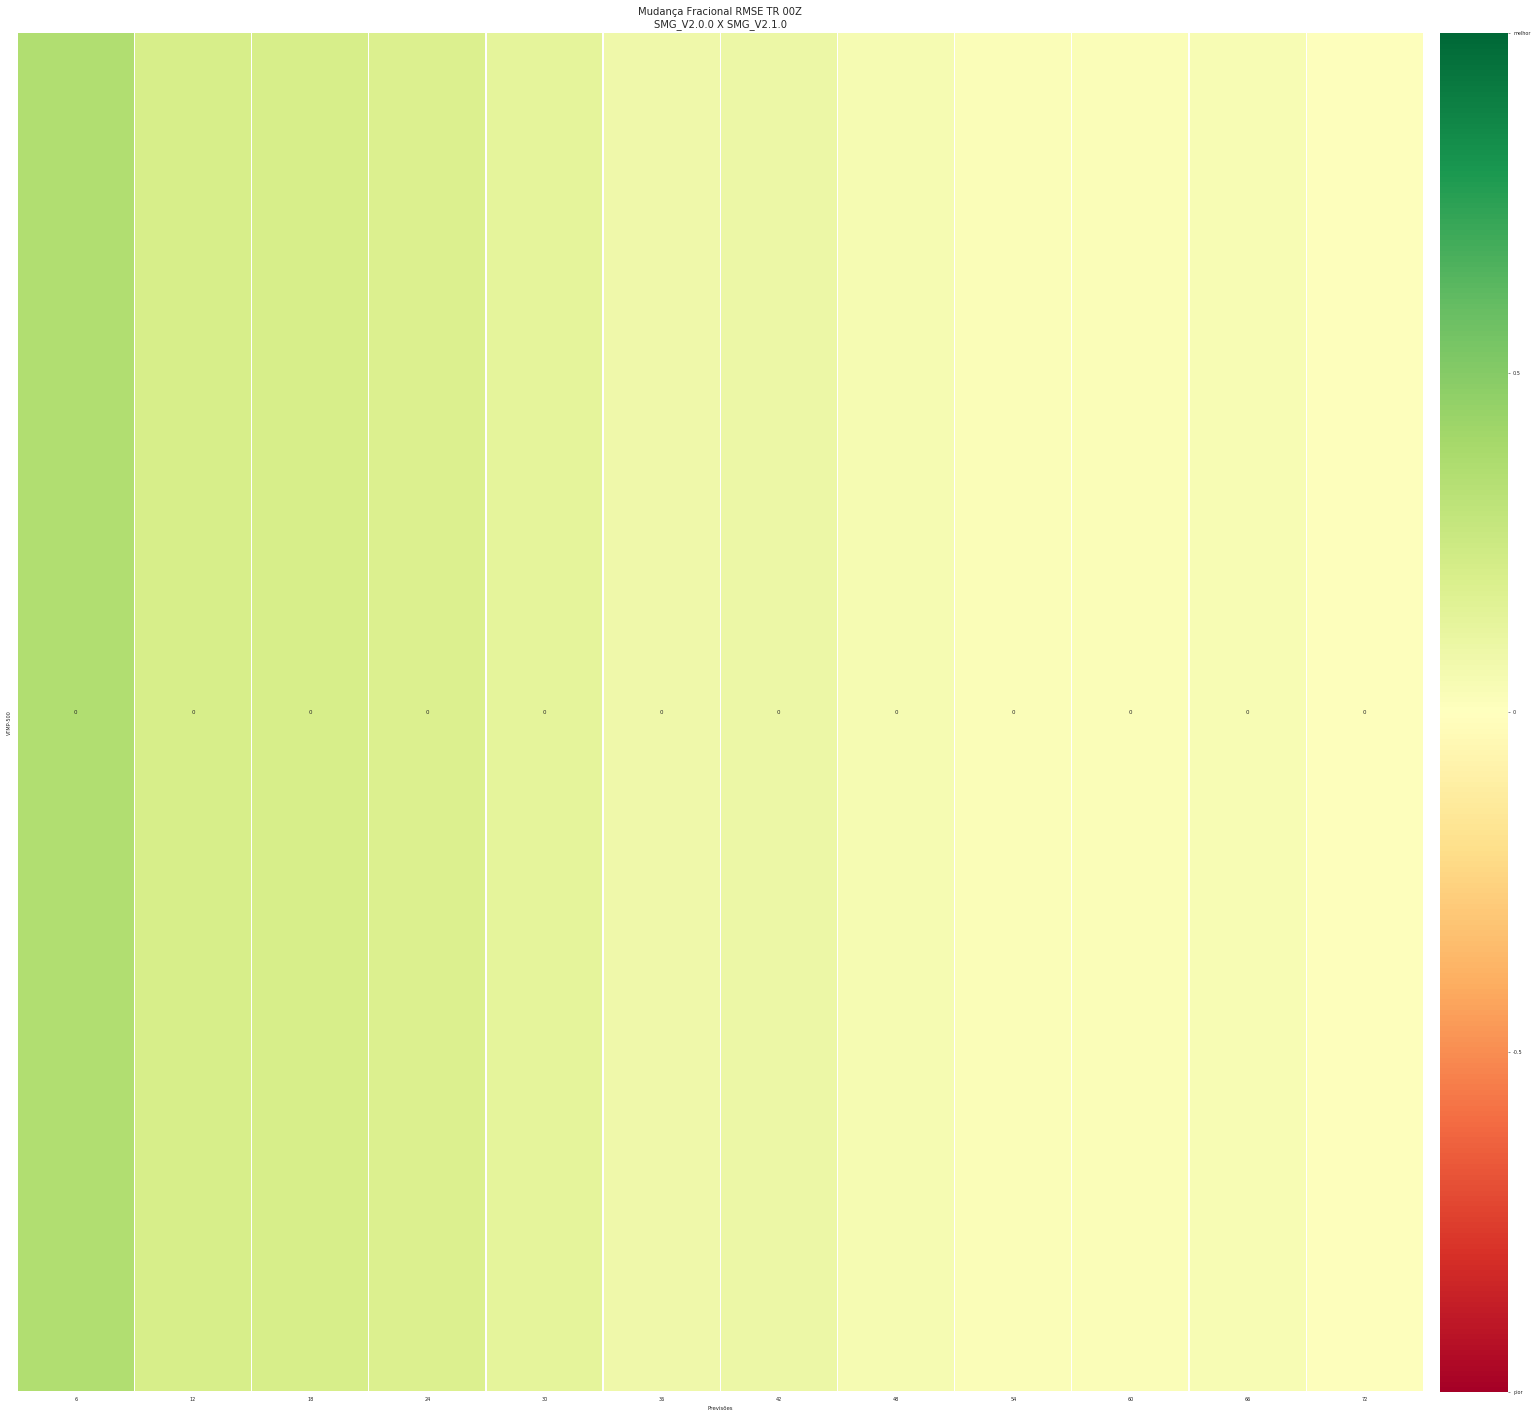

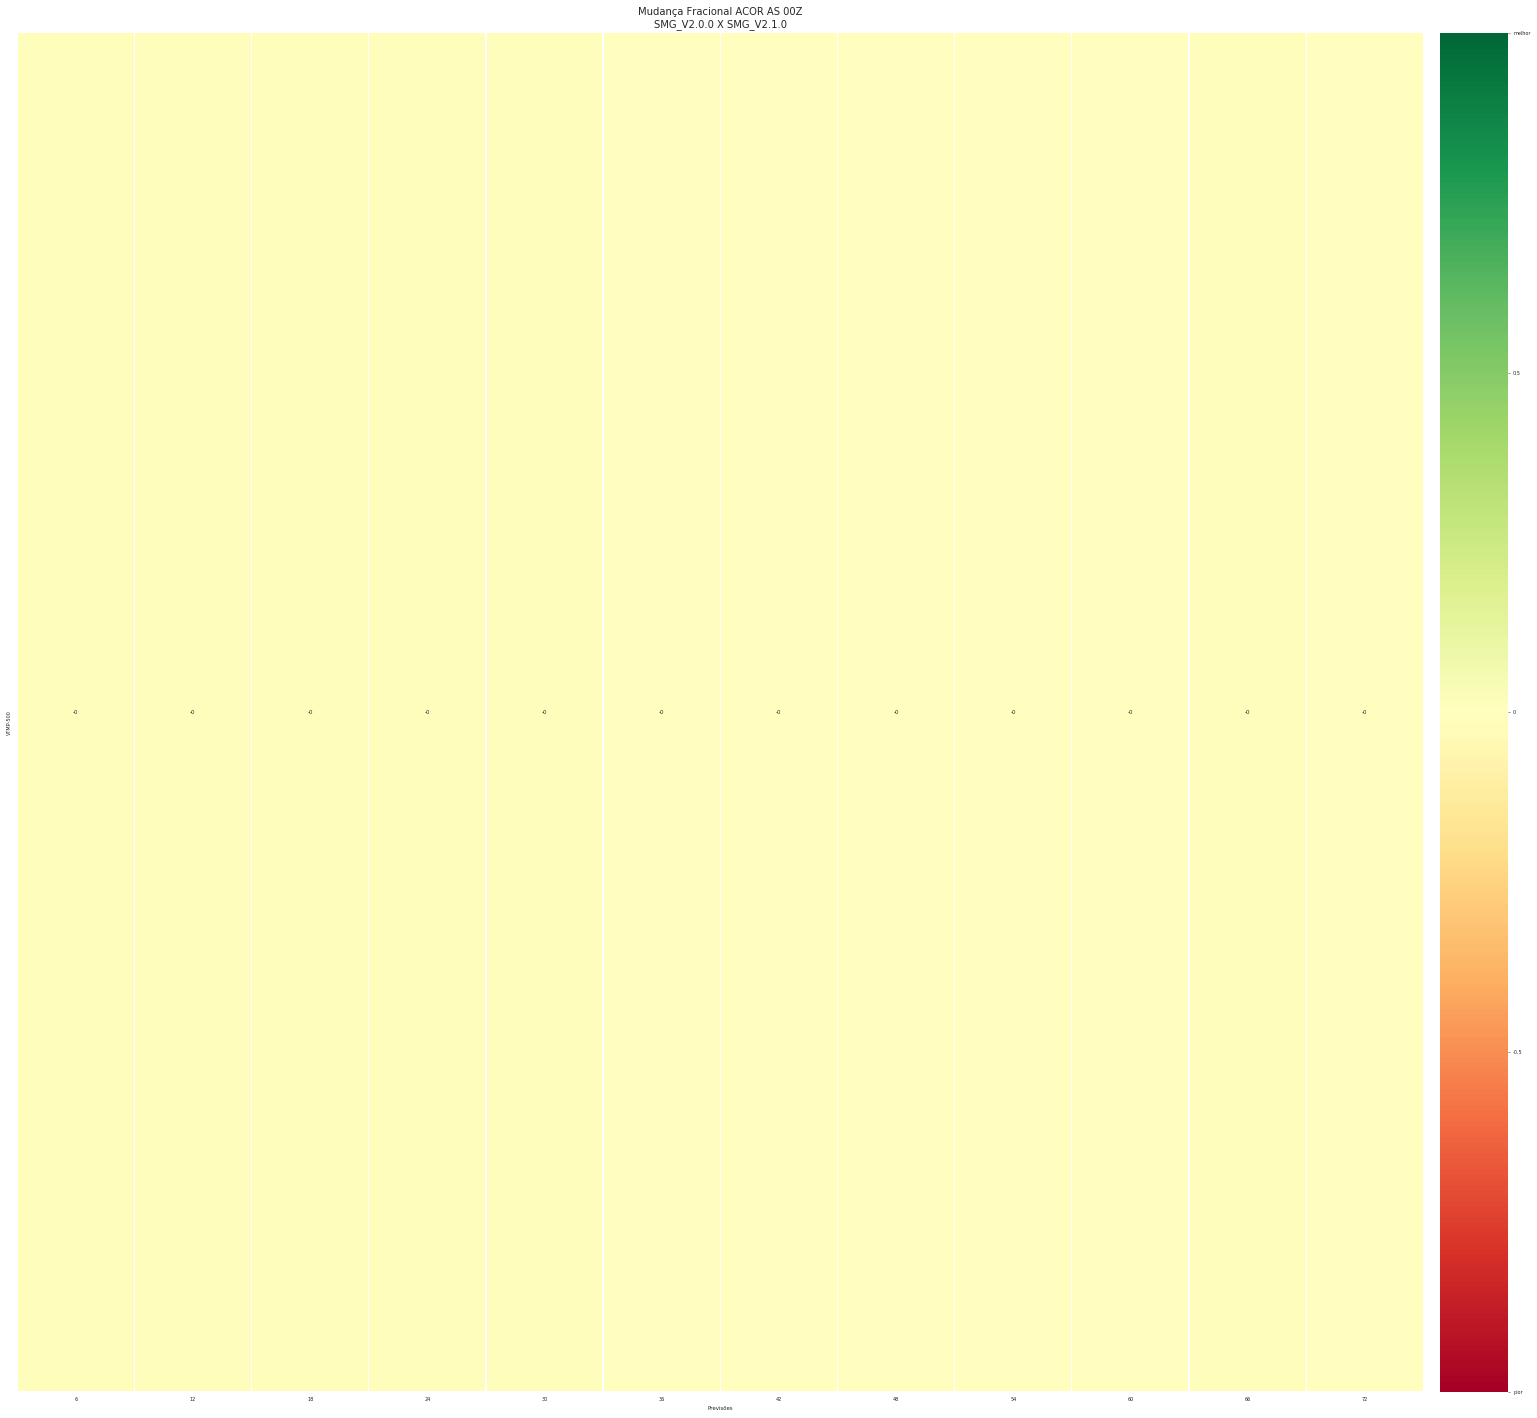

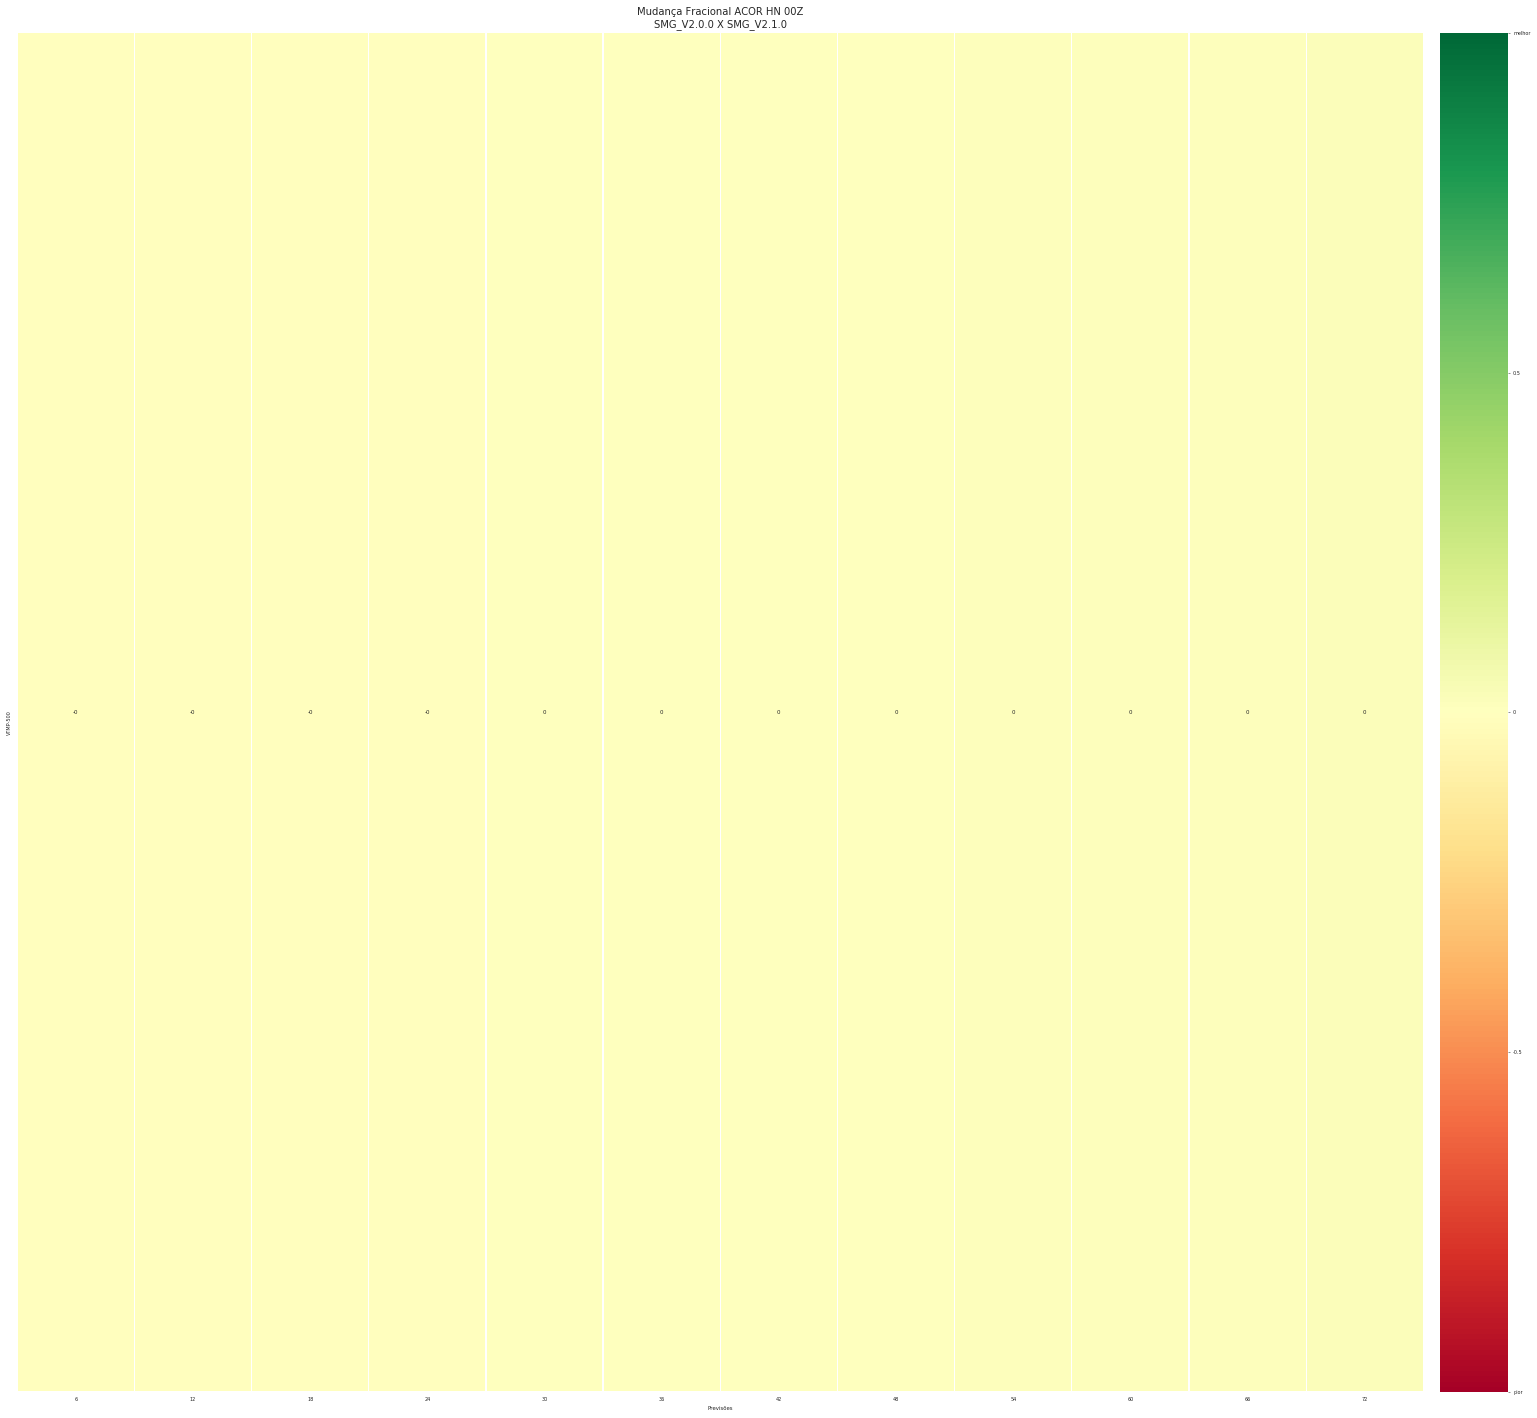

In [ ]:
pylab.rcParams['figure.figsize'] = (30,25)
plot_scorecard(datai,dataf,list_var,Stats,Tstats,tipo,Regs,hsin,bexp1,bexp2,base_path)